# Dissertation Data Creation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
import random
import os

Parameters for this dissertation:
- 3 layers, with randomized thicknesses (between 1 and 50m) and resistivities;
- Between 1 - 3 ellipses/rectangles of various sizes, locations, resistivities (between 10 and 1200 ohms);
- Equal probability of resistivity values, or normal distribution, or log-normal;
- Objects should not overlap at all. They can intersect with the layers and this will split polygon into two. Pay attention in order to keep same resistivity for the overall polygon;
- 64 electrodes spaced 5m apart

I will create 9 different datasets: comprising the different combinations of 1-3 ellipses/rectangles. 2000 images for each?

### An empty "World"

(<AxesSubplot:>, None)

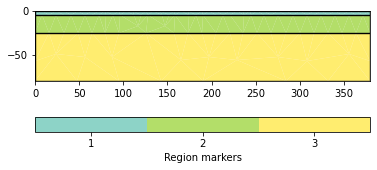

In [2]:
world = mt.createWorld(start=[0, 0], end=[380, -80], layers=[-5, -25], worldMarker=True)

pg.show(world)

### Dataset 1: One circle/ellipse

In [44]:
one_ellipse_list = []

for i in range(1, 35):
    
    length = random.randint(20, 360) 
    depth = random.randint(-70, -10)
    block_width = random.randint(5, 15)
    block_height = random.randint(5, 10)
    random_layer = random.randint(-10, -1)
    random_layer2 = random.randint(-40, -11)

    world = mt.createWorld(start=[0, 0], end=[380, -80], layers=[random_layer, random_layer2], worldMarker=True)
    circle = mt.createCircle(pos=[length, depth], radius=[block_width, block_height], 
                             marker=4, boundaryMarker=10, area=0.1)
    
    geom = world + circle
    one_ellipse_list.append(geom)

(<AxesSubplot:>, None)

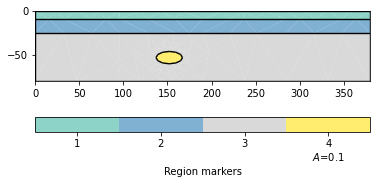

In [45]:
pg.show(one_ellipse_list[0])

(<AxesSubplot:>, None)

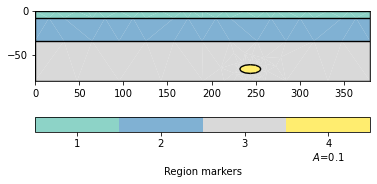

In [46]:
pg.show(one_ellipse_list[33])

#### Create a Dipole Dipole ('dd') measuring scheme with 4 electrodes. Put all electrode positions into the scheme to enforce mesh refinement. Also add further refinement nodes in a distance of 10% of electrode spacing to achieve sufficient numerical accuracy.

In [47]:
scheme = ert.createData(elecs = np.linspace(start=20, stop=360, num=64), schemeName='dd')

for p in scheme.sensorPositions():
    geom.createNode(p)
    geom.createNode(p + pg.RVector3(0, -0.1))

#### Create resistivity values. Linearly spaced out from 10 to 1200.

In [48]:
res_values = np.linspace(start=10, stop=1200, num=110).astype(int)

In [49]:
res_values

array([  10,   20,   31,   42,   53,   64,   75,   86,   97,  108,  119,
        130,  141,  151,  162,  173,  184,  195,  206,  217,  228,  239,
        250,  261,  272,  282,  293,  304,  315,  326,  337,  348,  359,
        370,  381,  392,  403,  413,  424,  435,  446,  457,  468,  479,
        490,  501,  512,  523,  534,  544,  555,  566,  577,  588,  599,
        610,  621,  632,  643,  654,  665,  675,  686,  697,  708,  719,
        730,  741,  752,  763,  774,  785,  796,  806,  817,  828,  839,
        850,  861,  872,  883,  894,  905,  916,  927,  937,  948,  959,
        970,  981,  992, 1003, 1014, 1025, 1036, 1047, 1058, 1068, 1079,
       1090, 1101, 1112, 1123, 1134, 1145, 1156, 1167, 1178, 1189, 1200])

### Add resistivity values to objects and layers

31/07/22 - 13:09:41 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:09:41 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:09:42 - pyGIMLi - INFO - Calculate geometric factors.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.074 s
FOP updating mesh dependencies ... 0 s
Obtaining geometric factors (analytical)
Calculating response for model: min = 10 max = 774
Allocating memory for primary potential...... 0.004

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.428
Factorize (Cholmod) matrix ... 0.737
Factorize (Cholmod) matrix ... 0.512
Factorize (Cholmod) matrix ... 0.258
Factorize (Cholmod) matrix ... 0.228
Factorize (Cholmod) matrix ... 0.122
Factorize (Cholmod) matrix ... 0.204
Factorize (Cholmod) matrix ... 0.212
Factorize (Cholmod) matrix ... 0.198
Factorize (Cholmod) matrix ... 0.418
Factorize (Cholmod) matrix ... 0.116
Factorize (Cholmod) matrix ... 0.196
Factorize (Cholmod) matrix ... 0.164
Factorize (Cholmod) matrix ... 

31/07/22 - 13:09:48 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:09:49 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.03 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 173 max = 1036
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000054020297787 : 0.013904069350130827
Allocating memory for primary potential...... 0.002

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.021
Factorize (Cholmod) matrix ... 0.02
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.02
Factorize (Cholmod) matrix ... 0.02
Factorize (Cholmod) matrix ... 0.02
Factorize (Cholmod) matrix ... 0.03
Factorize (Cholmod) matrix ... 0.024
Factorize (Cholmod) matrix ... 0.02
Factorize (C

31/07/22 - 13:09:53 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:09:54 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.069 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 282 max = 948
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000100003183021 : 0.024302734655696337
Allocating memory for primary potential...... 0.004

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.138
Factorize (Cholmod) matrix ... 0.303
Factorize (Cholmod) matrix ... 0.251
Factorize (Cholmod) matrix ... 0.098
Factorize (Cholmod) matrix ... 0.265
Factorize (Cholmod) matrix ... 0.154
Factorize (Cholmod) matrix ... 0.08
Factorize (Cholmod) matrix ... 0.088
Factorize (Cholmod) matrix ... 0.088
Factorize (Cholmod) matrix ... 0.086
Factori

31/07/22 - 13:09:58 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:09:59 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.05 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 86 max = 1134
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.255
Factorize (Cholmod) matrix ... 0.376
Factorize (Cholmod) matrix ... 0.208
Factorize (Cholmod) matrix ... 0.11
Factorize (Cholmod) matrix ... 0.11
Factorize (Cholmod) matrix ... 0.15
Factorize (Cholmod) matrix ... 0.15
Factorize (Cholmod) matrix ... 0.11
Factorize (Cholmod) matrix ... 0.119
Factorize (Cholmod) matrix ... 0.338
Factorize (Cholmod) matrix ... 0.104
Factorize (Cholmod) matrix ... 0.298
Factorize (Cholmod) matrix ... 0.414
Factorize (Cholmod) matrix ... 0.213
Factorize (Cholmod) matrix ... 0.091
Fac

31/07/22 - 13:10:05 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:10:05 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.04 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 413 max = 1178
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.161
Factorize (Cholmod) matrix ... 0.602
Factorize (Cholmod) matrix ... 0.16
Factorize (Cholmod) matrix ... 0.143
Factorize (Cholmod) matrix ... 0.1
Factorize (Cholmod) matrix ... 0.335
Factorize (Cholmod) matrix ... 0.517
Factorize (Cholmod) matrix ... 0.335
Factorize (Cholmod) matrix ... 0.186
Factorize (Cholmod) matrix ... 0.184
Factorize (Cholmod) matrix ... 0.321
Factorize (Cholmod) matrix ... 0.185
Factorize (Cholmod) matrix ... 0.469
Factorize (Cholmod) matrix ... 0.165
Factorize (Cholmod) matrix ... 0.171


31/07/22 - 13:10:12 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:10:12 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.027 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 162 max = 577
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.01000005696428826 : 0.035123739710785216
Allocating memory for primary potential...... 0.002

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.018
Factorize (Cholmod) matrix ... 0.02
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.022
Factorize (Cholmod) matrix ... 0.034
Factorize (Cholmod) matrix ... 0.034
Factorize (Cholmod) matrix ... 0.025
Factorize (Cholmod) matrix ... 0.023
Factorize (Cholmod) matrix ... 0.023
Factoriz

31/07/22 - 13:10:14 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:10:14 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.036 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 130 max = 806
Allocating memory for primary potential...... 0.002

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.113
Factorize (Cholmod) matrix ... 0.197
Factorize (Cholmod) matrix ... 0.266
Factorize (Cholmod) matrix ... 0.13
Factorize (Cholmod) matrix ... 0.195
Factorize (Cholmod) matrix ... 0.258
Factorize (Cholmod) matrix ... 0.167
Factorize (Cholmod) matrix ... 0.19
Factorize (Cholmod) matrix ... 0.081
Factorize (Cholmod) matrix ... 0.115
Factorize (Cholmod) matrix ... 0.085
Factorize (Cholmod) matrix ... 0.117
Factorize (Cholmod) matrix ... 0.123
Factorize (Cholmod) matrix ... 0.149
Factorize (Cholmod) matrix ... 0.109

31/07/22 - 13:10:19 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:10:20 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.044 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 304 max = 1134
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.195
Factorize (Cholmod) matrix ... 0.237
Factorize (Cholmod) matrix ... 0.227
Factorize (Cholmod) matrix ... 0.322
Factorize (Cholmod) matrix ... 0.271
Factorize (Cholmod) matrix ... 0.174
Factorize (Cholmod) matrix ... 0.165
Factorize (Cholmod) matrix ... 0.353
Factorize (Cholmod) matrix ... 0.183
Factorize (Cholmod) matrix ... 0.116
Factorize (Cholmod) matrix ... 0.339
Factorize (Cholmod) matrix ... 0.446
Factorize (Cholmod) matrix ... 0.123
Factorize (Cholmod) matrix ... 0.412
Factorize (Cholmod) matrix ... 0.

31/07/22 - 13:10:26 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:10:27 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.069 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 20 max = 1101
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.362
Factorize (Cholmod) matrix ... 0.166
Factorize (Cholmod) matrix ... 0.34
Factorize (Cholmod) matrix ... 0.139
Factorize (Cholmod) matrix ... 0.289
Factorize (Cholmod) matrix ... 0.128
Factorize (Cholmod) matrix ... 0.466
Factorize (Cholmod) matrix ... 0.178
Factorize (Cholmod) matrix ... 0.211
Factorize (Cholmod) matrix ... 0.114
Factorize (Cholmod) matrix ... 0.153
Factorize (Cholmod) matrix ... 0.172
Factorize (Cholmod) matrix ... 0.302
Factorize (Cholmod) matrix ... 0.577
Factorize (Cholmod) matrix ... 0.51

/tmp/ipykernel_10826/1153381858.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1,ax1=plt.subplots()
31/07/22 - 13:10:34 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:10:35 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.037 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 42 max = 916
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.077
Factorize (Cholmod) matrix ... 0.252
Factorize (Cholmod) matrix ... 0.435
Factorize (Cholmod) matrix ... 0.294
Factorize (Cholmod) matrix ... 0.294
Factorize (Cholmod) matrix ... 0.489
Factorize (Cholmod) matrix ... 0.335
Factorize (Cholmod) matrix ... 0.213
Factorize (Cholmod) matrix ... 0.18
Factorize (Cholmod) matrix ... 0.271
Factorize (Cholmod) matrix ... 0.225
Factorize (Cholmod) matrix ... 0.305
Factorize (Cholmod) matrix ... 0.204
Factorize (Cholmod) matrix ... 0.198
Factorize (Cholmod) matrix ... 0.14


31/07/22 - 13:10:41 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:10:42 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.051 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 162 max = 588
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.163
Factorize (Cholmod) matrix ... 0.317
Factorize (Cholmod) matrix ... 0.2
Factorize (Cholmod) matrix ... 0.122
Factorize (Cholmod) matrix ... 0.159
Factorize (Cholmod) matrix ... 0.34
Factorize (Cholmod) matrix ... 0.19
Factorize (Cholmod) matrix ... 0.244
Factorize (Cholmod) matrix ... 0.272
Factorize (Cholmod) matrix ... 0.318
Factorize (Cholmod) matrix ... 0.103
Factorize (Cholmod) matrix ... 0.099
Factorize (Cholmod) matrix ... 0.215
Factorize (Cholmod) matrix ... 0.198
Factorize (Cholmod) matrix ... 0.219
F

31/07/22 - 13:10:48 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:10:49 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.039 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 53 max = 894
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000033659173587 : 0.08969973797828762
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.105
Factorize (Cholmod) matrix ... 0.266
Factorize (Cholmod) matrix ... 0.2
Factorize (Cholmod) matrix ... 0.271
Factorize (Cholmod) matrix ... 0.091
Factorize (Cholmod) matrix ... 0.108
Factorize (Cholmod) matrix ... 0.127
Factorize (Cholmod) matrix ... 0.286
Factorize (Cholmod) matrix ... 0.337
Factorize (Cholmod) matrix ... 0.225
Factorize 

31/07/22 - 13:10:55 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:10:55 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.035 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 42 max = 1156
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000126171784798 : 0.10103918683269394
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.026
Factorize (Cholmod) matrix ... 0.023
Factorize (Cholmod) matrix ... 0.025
Factorize (Cholmod) matrix ... 0.023
Factorize (Cholmod) matrix ... 0.025
Factorize (Cholmod) matrix ... 0.026
Factorize (Cholmod) matrix ... 0.025
Factorize (Cholmod) matrix ... 0.033
Factorize (Cholmod) matrix ... 0.026
Factorize (Cholmod) matrix ... 0.032
Factori

31/07/22 - 13:10:57 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:10:57 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.05 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 370 max = 1167
Allocating memory for primary potential...... 0.004

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.4
Factorize (Cholmod) matrix ... 0.369
Factorize (Cholmod) matrix ... 0.372
Factorize (Cholmod) matrix ... 0.459
Factorize (Cholmod) matrix ... 0.443
Factorize (Cholmod) matrix ... 0.104
Factorize (Cholmod) matrix ... 0.11
Factorize (Cholmod) matrix ... 0.111
Factorize (Cholmod) matrix ... 0.283
Factorize (Cholmod) matrix ... 0.416
Factorize (Cholmod) matrix ... 0.254
Factorize (Cholmod) matrix ... 0.177
Factorize (Cholmod) matrix ... 0.346
Factorize (Cholmod) matrix ... 0.121
Factorize (Cholmod) matrix ... 0.149


31/07/22 - 13:11:04 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:11:05 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.056 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 64 max = 1189
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000764648400698 : 0.01438975170986446
Allocating memory for primary potential...... 0.009

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.275
Factorize (Cholmod) matrix ... 0.587
Factorize (Cholmod) matrix ... 0.382
Factorize (Cholmod) matrix ... 0.252
Factorize (Cholmod) matrix ... 0.295
Factorize (Cholmod) matrix ... 0.279
Factorize (Cholmod) matrix ... 0.232
Factorize (Cholmod) matrix ... 0.298
Factorize (Cholmod) matrix ... 0.124
Factorize (Cholmod) matrix ... 0.171
Factori

31/07/22 - 13:11:12 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:11:13 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.053 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 195 max = 948
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.295
Factorize (Cholmod) matrix ... 0.181
Factorize (Cholmod) matrix ... 0.328
Factorize (Cholmod) matrix ... 0.25
Factorize (Cholmod) matrix ... 0.311
Factorize (Cholmod) matrix ... 0.153
Factorize (Cholmod) matrix ... 0.118
Factorize (Cholmod) matrix ... 0.11
Factorize (Cholmod) matrix ... 0.116
Factorize (Cholmod) matrix ... 0.173
Factorize (Cholmod) matrix ... 0.266
Factorize (Cholmod) matrix ... 0.278
Factorize (Cholmod) matrix ... 0.319
Factorize (Cholmod) matrix ... 0.201
Factorize (Cholmod) matrix ... 0.124

31/07/22 - 13:11:19 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:11:19 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.04 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 162 max = 1101
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.292
Factorize (Cholmod) matrix ... 0.124
Factorize (Cholmod) matrix ... 0.263
Factorize (Cholmod) matrix ... 0.441
Factorize (Cholmod) matrix ... 0.272
Factorize (Cholmod) matrix ... 0.083
Factorize (Cholmod) matrix ... 0.12
Factorize (Cholmod) matrix ... 0.115
Factorize (Cholmod) matrix ... 0.085
Factorize (Cholmod) matrix ... 0.309
Factorize (Cholmod) matrix ... 0.15
Factorize (Cholmod) matrix ... 0.1
Factorize (Cholmod) matrix ... 0.193
Factorize (Cholmod) matrix ... 0.185
Factorize (Cholmod) matrix ... 0.151
F

31/07/22 - 13:11:25 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:11:25 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.038 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 206 max = 446
Allocating memory for primary potential...... 0.005

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.026
Factorize (Cholmod) matrix ... 0.018
Factorize (Cholmod) matrix ... 0.025
Factorize (Cholmod) matrix ... 0.024
Factorize (Cholmod) matrix ... 0.021
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.018
Factorize (Cholmod) matrix ... 0.018
Factorize (Cholmod) matrix ... 0.02
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.02

31/07/22 - 13:11:27 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:11:28 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.042 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 250 max = 1145
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000055957320952 : 0.013559348075839146
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.02
Factorize (Cholmod) matrix ... 0.02
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.025
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.019
Factorize (Cholmod) matrix ... 0.029
Factorize (Cholmod) matrix ... 0.022
Factori

31/07/22 - 13:11:48 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:11:49 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.047 s
FOP updating mesh dependencies ... 0 s
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000306594212064 : 0.014628896753736471
Calculating response for model: min = 282 max = 1068
Allocating memory for primary potential...... 0.002

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.03
Factorize (Cholmod) matrix ... 0.029
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.033
Factorize (Cholmod) matrix ... 0.025
Factorize (Cholmod) matrix ... 0.025
Factorize (Cholmod) matrix ... 0.025
Factorize (Cholmod) matrix ... 0.025
Factorize (Cholmod) matrix ... 0.03
Factorize (Cholmod) matrix ... 0.025
Factori

31/07/22 - 13:11:51 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:11:51 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.053 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 359 max = 1047
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.28
Factorize (Cholmod) matrix ... 0.206
Factorize (Cholmod) matrix ... 0.243
Factorize (Cholmod) matrix ... 0.215
Factorize (Cholmod) matrix ... 0.164
Factorize (Cholmod) matrix ... 0.137
Factorize (Cholmod) matrix ... 0.44
Factorize (Cholmod) matrix ... 0.354
Factorize (Cholmod) matrix ... 0.316
Factorize (Cholmod) matrix ... 0.387
Factorize (Cholmod) matrix ... 0.151
Factorize (Cholmod) matrix ... 0.136
Factorize (Cholmod) matrix ... 0.139
Factorize (Cholmod) matrix ... 0.314
Factorize (Cholmod) matrix ... 0.29

31/07/22 - 13:12:00 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:12:00 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.044 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 468 max = 1068
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.164
Factorize (Cholmod) matrix ... 0.147
Factorize (Cholmod) matrix ... 0.35
Factorize (Cholmod) matrix ... 0.168
Factorize (Cholmod) matrix ... 0.241
Factorize (Cholmod) matrix ... 0.148
Factorize (Cholmod) matrix ... 0.099
Factorize (Cholmod) matrix ... 0.101
Factorize (Cholmod) matrix ... 0.133
Factorize (Cholmod) matrix ... 0.126
Factorize (Cholmod) matrix ... 0.126
Factorize (Cholmod) matrix ... 0.299
Factori

31/07/22 - 13:12:06 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:12:06 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.039 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 184 max = 1047
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000081456632878 : 0.014576631865062757
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.236
Factorize (Cholmod) matrix ... 0.261
Factorize (Cholmod) matrix ... 0.297
Factorize (Cholmod) matrix ... 0.374
Factorize (Cholmod) matrix ... 0.143
Factorize (Cholmod) matrix ... 0.114
Factorize (Cholmod) matrix ... 0.151
Factorize (Cholmod) matrix ... 0.13
Factorize (Cholmod) matrix ... 0.155
Factorize (Cholmod) matrix ... 0.364
Factor

31/07/22 - 13:12:13 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:12:13 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.046 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 534 max = 1014
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.41
Factorize (Cholmod) matrix ... 0.191
Factorize (Cholmod) matrix ... 0.406
Factorize (Cholmod) matrix ... 0.385
Factorize (Cholmod) matrix ... 0.457
Factorize (Cholmod) matrix ... 0.383
Factorize (Cholmod) matrix ... 0.334
Factorize (Cholmod) matrix ... 0.266
Factorize (Cholmod) matrix ... 0.165
Factorize (Cholmod) matrix ... 0.597
Factorize (Cholmod) matrix ... 0.361
Factorize (Cholmod) matrix ... 0.305
Factorize (Cholmod) matrix ... 0.509
Factorize (Cholmod) matrix ... 0.303
Factorize (Cholmod) matrix ... 0.1

31/07/22 - 13:12:22 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:12:22 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.037 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 86 max = 796
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.163
Factorize (Cholmod) matrix ... 0.164
Factorize (Cholmod) matrix ... 0.137
Factorize (Cholmod) matrix ... 0.117
Factorize (Cholmod) matrix ... 0.274
Factorize (Cholmod) matrix ... 0.131
Factorize (Cholmod) matrix ... 0.244
Factorize (Cholmod) matrix ... 0.169
Factorize (Cholmod) matrix ... 0.128
Factorize (Cholmod) matrix ... 0.154
Factorize (Cholmod) matrix ... 0.163
Factorize (Cholmod) matrix ... 0.134
Factorize (Cholmod) matrix ... 0.185
Factorize (Cholmod) matrix ... 0.25
Factorize (Cholmod) matrix ... 0.481

31/07/22 - 13:12:29 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:12:30 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.036 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 610 max = 1090
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000031183515501 : 0.01626788375380153
Allocating memory for primary potential...... 0.002

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.155
Factorize (Cholmod) matrix ... 0.261
Factorize (Cholmod) matrix ... 0.151
Factorize (Cholmod) matrix ... 0.216
Factorize (Cholmod) matrix ... 0.182
Factorize (Cholmod) matrix ... 0.167
Factorize (Cholmod) matrix ... 0.137
Factorize (Cholmod) matrix ... 0.177
Factorize (Cholmod) matrix ... 0.242
Factorize (Cholmod) matrix ... 0.147
Factor

31/07/22 - 13:12:35 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:12:36 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.049 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 195 max = 1003
Allocating memory for primary potential...... 0.004

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.272
Factorize (Cholmod) matrix ... 0.664
Factorize (Cholmod) matrix ... 0.163
Factorize (Cholmod) matrix ... 0.124
Factorize (Cholmod) matrix ... 0.267
Factorize (Cholmod) matrix ... 0.243
Factorize (Cholmod) matrix ... 0.46
Factorize (Cholmod) matrix ... 0.225
Factorize (Cholmod) matrix ... 0.503
Factorize (Cholmod) matrix ... 0.126
Factorize (Cholmod) matrix ... 0.242
Factorize (Cholmod) matrix ... 0.839
Factorize (Cholmod) matrix ... 0.542
Factorize (Cholmod) matrix ... 0.378
Factorize (Cholmod) matrix ... 0.2

31/07/22 - 13:12:45 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:12:46 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.062 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 239 max = 1112
Allocating memory for primary potential...... 0.004

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.568
Factorize (Cholmod) matrix ... 0.555
Factorize (Cholmod) matrix ... 0.539
Factorize (Cholmod) matrix ... 0.346
Factorize (Cholmod) matrix ... 0.389
Factorize (Cholmod) matrix ... 0.307
Factorize (Cholmod) matrix ... 0.273
Factorize (Cholmod) matrix ... 0.495
Factorize (Cholmod) matrix ... 0.156
Factorize (Cholmod) matrix ... 0.133
Factorize (Cholmod) matrix ... 0.145
Factorize (Cholmod) matrix ... 0.173
Factorize (Cholmod) matrix ... 0.186
Factorize (Cholmod) matrix ... 0.216
Factorize (Cholmod) matrix ... 0.

31/07/22 - 13:12:55 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 13:12:56 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.157 s
FOP updating mesh dependencies ... 0 s
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000100372528563 : 0.014645271395597969
Calculating response for model: min = 512 max = 1156
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.065
Factorize (Cholmod) matrix ... 0.071
Factorize (Cholmod) matrix ... 0.062
Factorize (Cholmod) matrix ... 0.069
Factorize (Cholmod) matrix ... 0.106
Factorize (Cholmod) matrix ... 0.111
Factorize (Cholmod) matrix ... 0.066
Factorize (Cholmod) matrix ... 0.13
Factorize (Cholmod) matrix ... 0.098
Factorize (Cholmod) matrix ... 0.062
Factor

<Figure size 432x288 with 0 Axes>

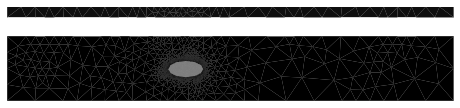

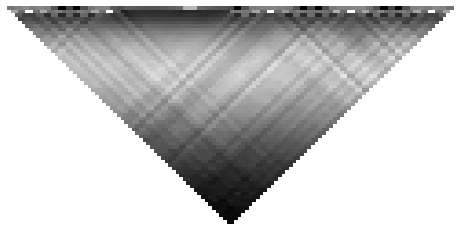

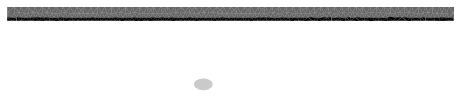

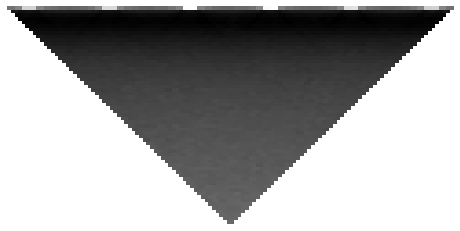

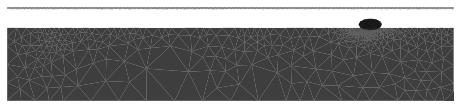

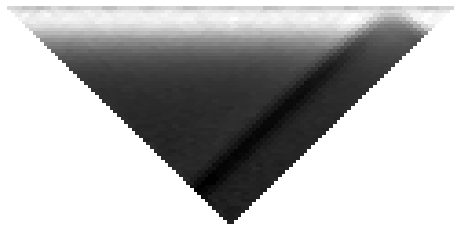

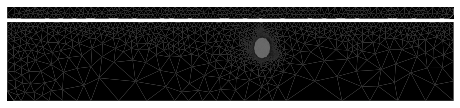

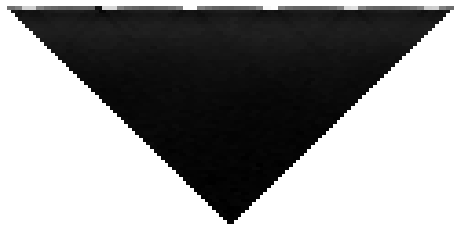

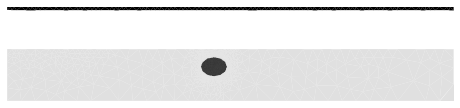

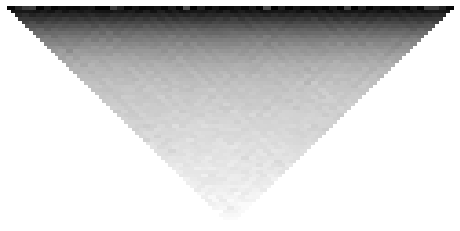

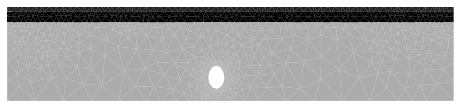

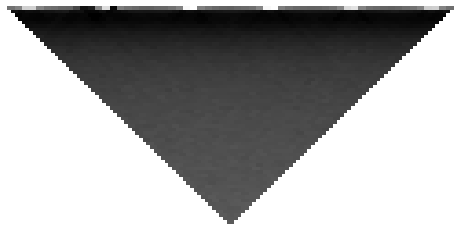

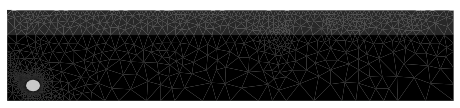

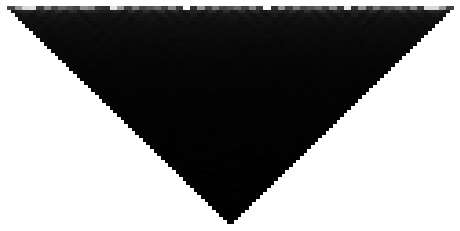

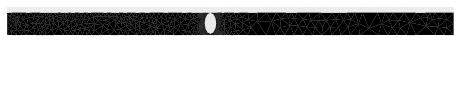

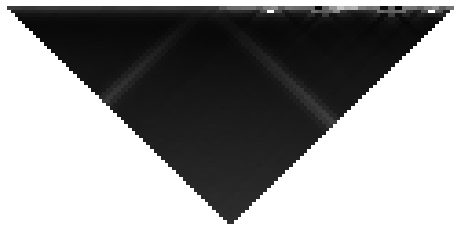

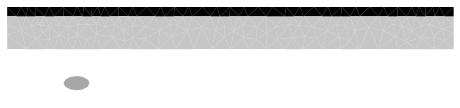

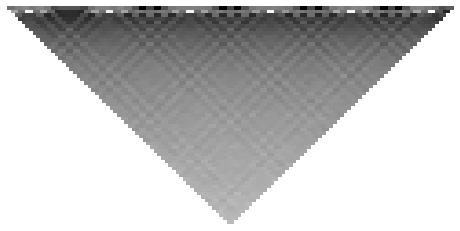

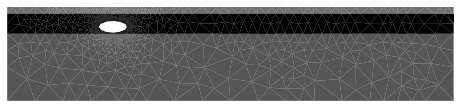

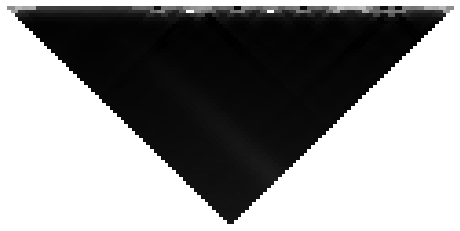

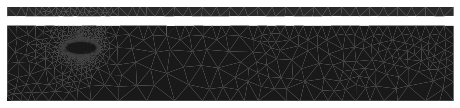

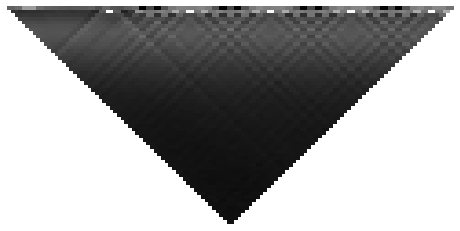

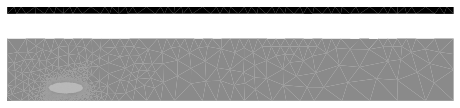

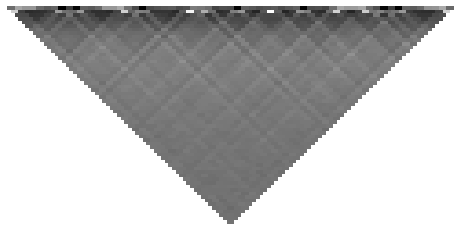

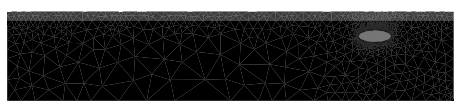

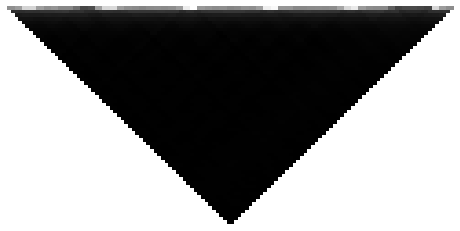

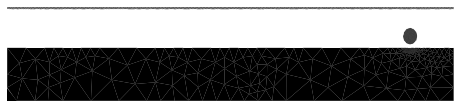

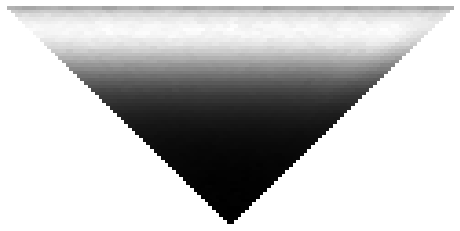

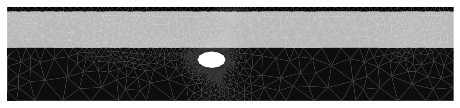

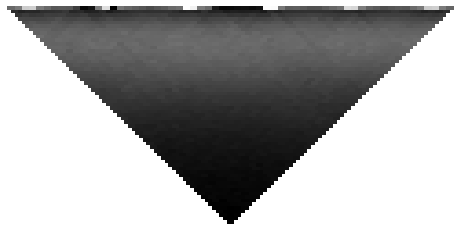

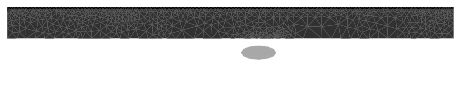

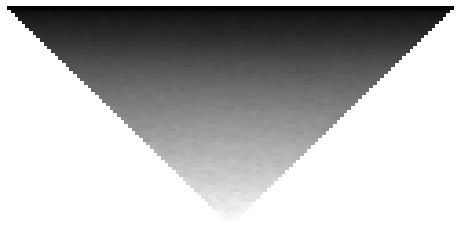

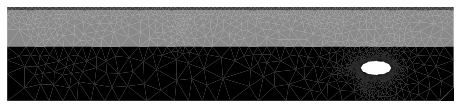

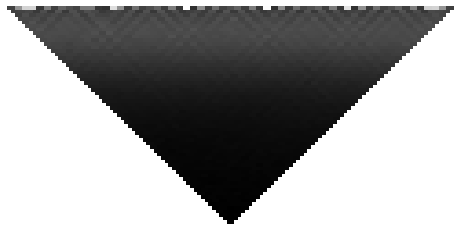

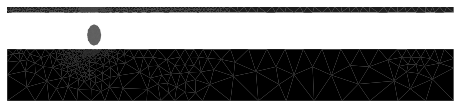

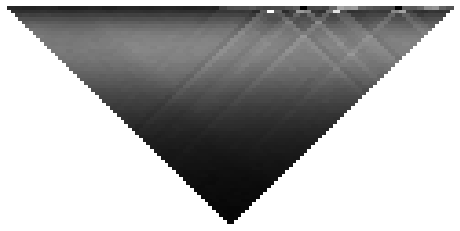

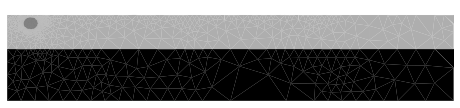

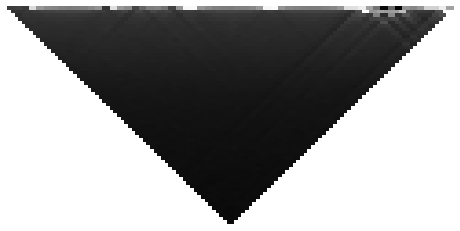

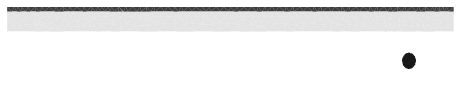

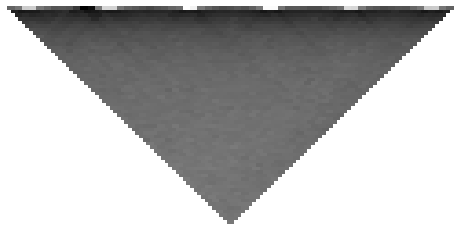

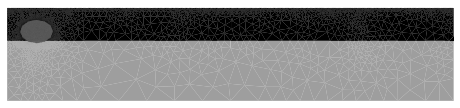

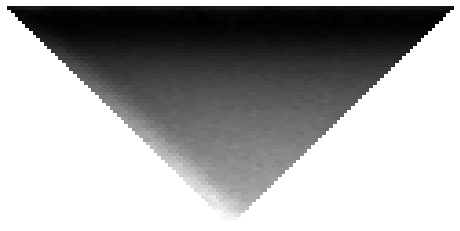

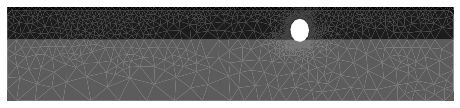

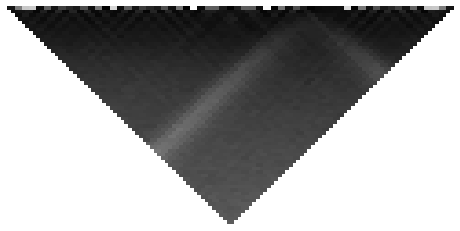

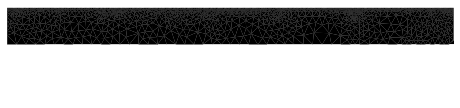

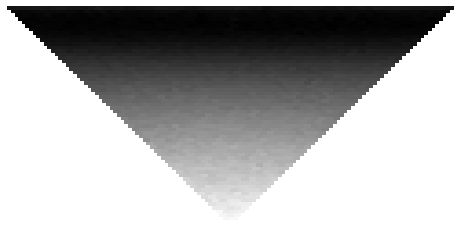

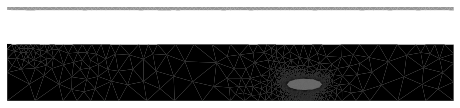

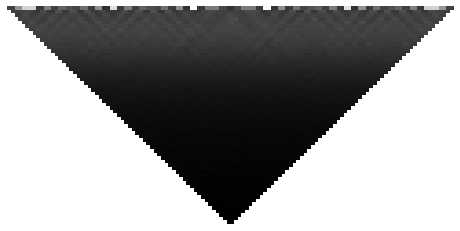

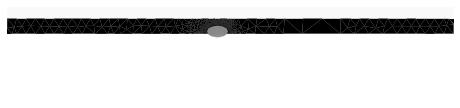

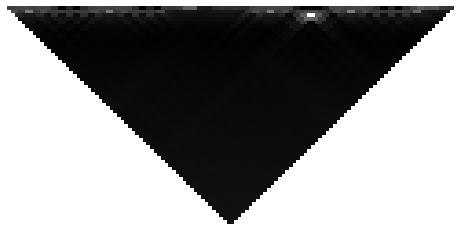

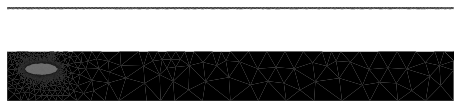

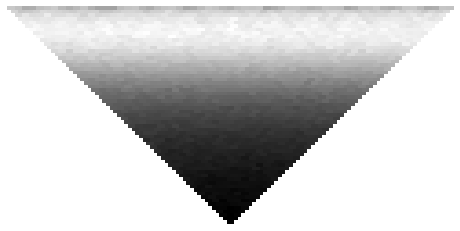

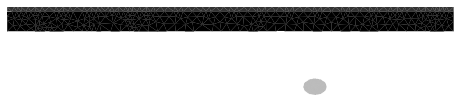

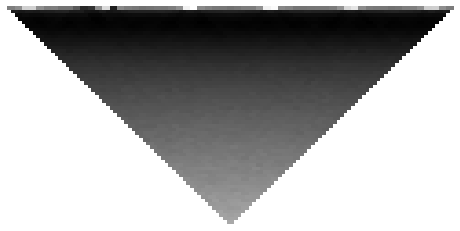

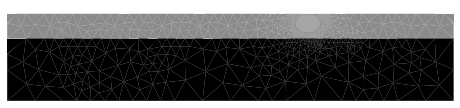

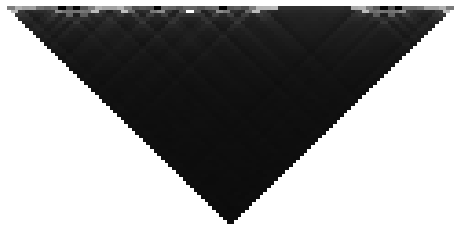

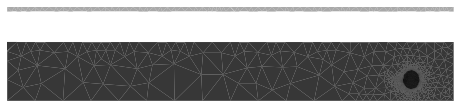

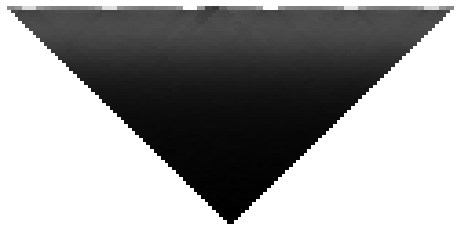

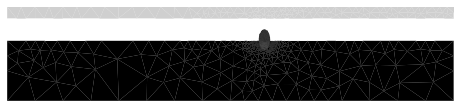

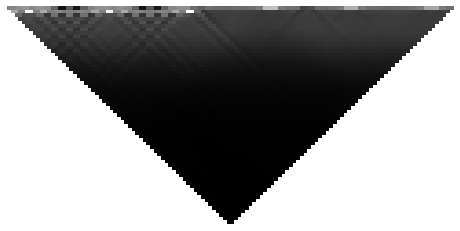

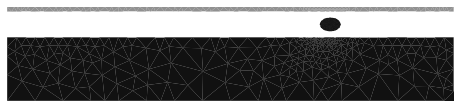

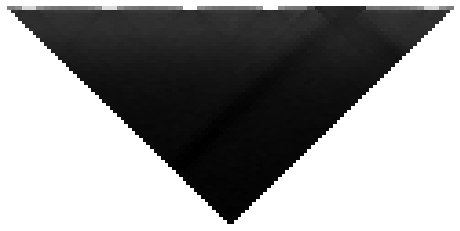

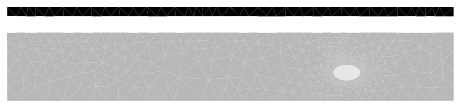

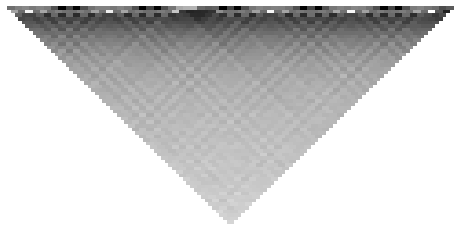

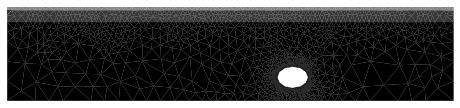

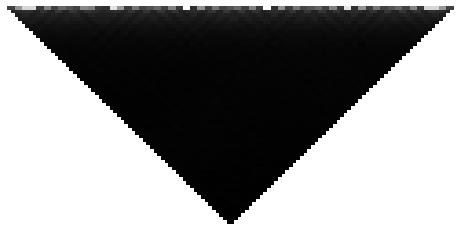

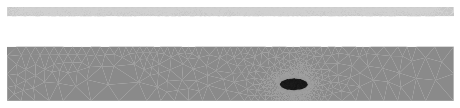

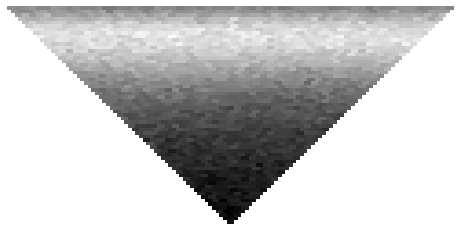

In [50]:
plt.rcParams['image.cmap']='gray'
plt.set_cmap('gray')
plt.set_cmap('gray')

obj_res_values = []
l1_res_values = []
l2_res_values = []
l3_res_values = []

counter = 1600
    
for i in one_ellipse_list:
    
    mesh = mt.createMesh(i, quality = 34)
    
    object_res = random.choice(res_values)
    layer_1_res = random.choice(res_values)
    layer_2_res = random.choice(res_values)
    layer_3_res = random.choice(res_values)
    
    rhomap = [[0, object_res], [1, layer_1_res], [2, layer_2_res], [3, layer_3_res], [4, object_res]]
    
    fig,ax=plt.subplots()
    pg.show(mesh, data=rhomap, label='Resistivity $(\Omega$m)', showMesh=False, showBoundary=False, colorBar=False,
           cMap='gray', vmin=10, vmax=1200, ax=ax)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig.set_size_inches(8,fig.get_figheight(), forward=True)
    
    fig.savefig('/home/gonde94/Documents/Synthetic_Data/True_Model/'+str(counter)+'true_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    data = ert.simulate(mesh, res=rhomap, scheme=scheme, noiseLevel=1, noiseAbs=1e-6, seed=42)
    data.markInvalid(data('rhoa') < 0)
    data.removeInvalid()
    
    fig1,ax1=plt.subplots()
    pg.show(data, showMesh=False, showBoundary=False, colorBar=False, cMap='gray', vmin=10, vmax=1200, ax=ax1)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    ax1.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig1.set_size_inches(8,fig1.get_figheight(), forward=True)
    
    fig1.savefig('/home/gonde94/Documents/Synthetic_Data/App_res_model/'+str(counter)+'app_res_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    obj_res_values.append(object_res)
    l3_res_values.append(layer_3_res)    
    l2_res_values.append(layer_2_res)
    l1_res_values.append(layer_1_res)
    
    counter = counter + 1

### Save values to a file

In [35]:
with open('obj_res_1e.txt', 'w') as fp:
    for item in obj_res_values:
        fp.write("%i\n" % item)

In [102]:
obj_res_values = []

with open('obj_res_1e.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        obj_res_values.append(x)

In [103]:
len(obj_res_values)

1600

In [36]:
with open('l1_res_1e.txt', 'w') as fr:
    for item in l1_res_values:
        fr.write("%i\n" % item)

In [37]:
with open('l2_res_1e.txt', 'w') as fq:
    for item in l2_res_values:
        fq.write("%i\n" % item)

In [38]:
with open('l3_res_1e.txt', 'w') as ft:
    for item in l3_res_values:
        ft.write("%i\n" % item)

### Append new values to files

In [40]:
with open('obj_res_1e.txt', 'a+') as fp:
    for item in obj_res_values:
        fp.write('%i\n' % item)

In [41]:
with open('l1_res_1e.txt', 'a+') as fr:
    for item in l1_res_values:
        fr.write("%i\n" % item)

In [42]:
with open('l2_res_1e.txt', 'a+') as fq:
    for item in l2_res_values:
        fq.write("%i\n" % item)

In [43]:
with open('l3_res_1e.txt', 'a+') as ft:
    for item in l3_res_values:
        ft.write("%i\n" % item)

In [109]:
l1values = []
l2values = []
l3values = []

with open('l1_res_1e.txt', 'r') as fr:
    for line in fr:
        x = line[:-1]
        l1values.append(x)
        
with open('l2_res_1e.txt', 'r') as fq:
    for line in fq:
        x = line[:-1]
        l2values.append(x)
        
with open('l3_res_1e.txt', 'r') as ft:
    for line in ft:
        x = line[:-1]
        l3values.append(x)    

In [82]:
len(l1values)

1600

In [83]:
type(l1values[0])

str

### View distributions of object and layer resistivities

Convert to integers and sort values

In [110]:
obj_res_values = list(map(int, obj_res_values))
l1values = list(map(int, l1values))
l2values = list(map(int, l2values))
l3values = list(map(int, l3values))

In [111]:
obj_res_values.sort()
l1values.sort()
l2values.sort()
l3values.sort()

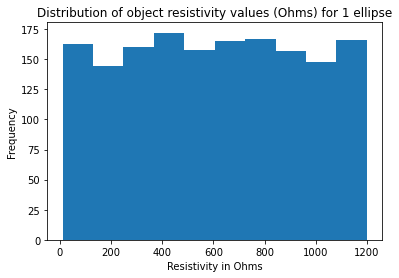

In [114]:
plt.hist(obj_res_values)
plt.title('Distribution of object resistivity values (Ohms) for 1 ellipse')
plt.xlabel('Resistivity in Ohms')
plt.ylabel('Frequency')
#plt.savefig('Distribution of objective resistivity values (Ohms) for 1 ellipse')

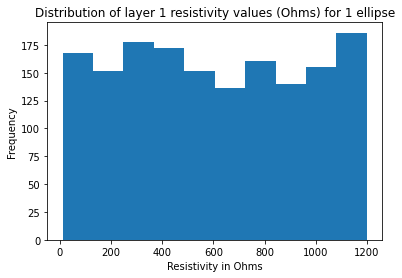

In [91]:
plt.hist(l1values)
plt.title('Distribution of layer 1 resistivity values (Ohms) for 1 ellipse')
plt.xlabel('Resistivity in Ohms')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 200, 400, 600, 800, 1000, 1200])
#plt.savefig('Distribution of layer 1 resistivity values (Ohms) for 1 ellipse')

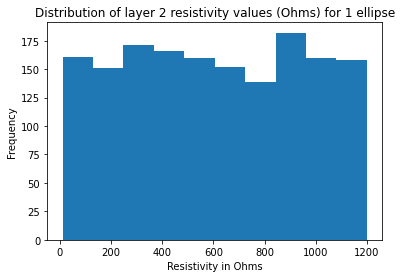

In [117]:
plt.hist(l2values)
plt.title('Distribution of layer 2 resistivity values (Ohms) for 1 ellipse')
plt.xlabel('Resistivity in Ohms')
plt.ylabel('Frequency')
#plt.savefig('Distribution of layer 2 resistivity values (Ohms) for 1 ellipse')

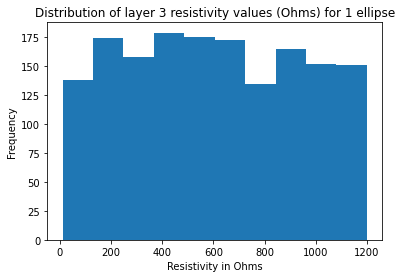

In [119]:
plt.hist(l3values)
plt.title('Distribution of layer 3 resistivity values (Ohms) for 1 ellipse')
plt.xlabel('Resistivity in Ohms')
plt.ylabel('Frequency')
#plt.savefig('Distribution of layer 3 resistivity values (Ohms) for 1 ellipse')

### Dataset 2: One rectangle

In [2]:
one_rectangle_list = []

for i in range(1, 2):
    start_length = random.randint(20, 350)
    start_depth = random.randint(-60, -5)
    end_length = random.randint(30, 360)
    end_depth = random.randint(-80, -10)
    random_layer = random.randint(-10, -1)
    random_layer2 = random.randint(-40, -11)
    
    world = mt.createWorld(start=[0, 0], end=[380, -80], layers=[random_layer, random_layer2], worldMarker=True)
    rectangle = mt.createRectangle(start=[start_length, start_depth], end=[end_length, end_depth],
                                  isclosed=True, marker=4, area=0.1)
    
    geom = world + rectangle
    one_rectangle_list.append(geom)

(<AxesSubplot:>, None)

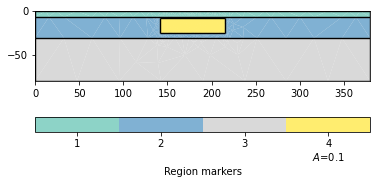

In [3]:
pg.show(one_rectangle_list[0])

(<AxesSubplot:>, None)

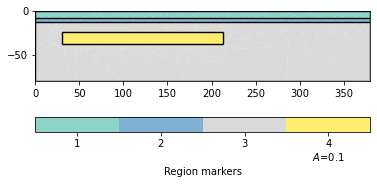

In [4]:
pg.show(one_rectangle_list[5])

#### Create a Dipole Dipole ('dd') measuring scheme with 4 electrodes. Put all electrode positions into the scheme to enforce mesh refinement. Also add further refinement nodes in a distance of 10% of electrode spacing to achieve sufficient numerical accuracy.

In [4]:
scheme = ert.createData(elecs = np.linspace(start=20, stop=360, num=64), schemeName='dd')

for p in scheme.sensorPositions():
    geom.createNode(p)
    geom.createNode(p + pg.RVector3(0, -0.1))

#### Create resistivity values. Linearly spaced out from 10 to 1200.

In [5]:
res_values = np.linspace(start=10, stop=1200, num=110).astype(int)

In [6]:
res_values

array([  10,   20,   31,   42,   53,   64,   75,   86,   97,  108,  119,
        130,  141,  151,  162,  173,  184,  195,  206,  217,  228,  239,
        250,  261,  272,  282,  293,  304,  315,  326,  337,  348,  359,
        370,  381,  392,  403,  413,  424,  435,  446,  457,  468,  479,
        490,  501,  512,  523,  534,  544,  555,  566,  577,  588,  599,
        610,  621,  632,  643,  654,  665,  675,  686,  697,  708,  719,
        730,  741,  752,  763,  774,  785,  796,  806,  817,  828,  839,
        850,  861,  872,  883,  894,  905,  916,  927,  937,  948,  959,
        970,  981,  992, 1003, 1014, 1025, 1036, 1047, 1058, 1068, 1079,
       1090, 1101, 1112, 1123, 1134, 1145, 1156, 1167, 1178, 1189, 1200])

#### Add resistivity values to object and layers

In [ ]:
plt.rcParams['image.cmap']='gray'
plt.set_cmap('gray')
plt.set_cmap('gray')

counter = 616
    
for i in one_rectangle_list:
    
    mesh = mt.createMesh(i, quality = 34)
    
    object_res = random.choice(res_values)
    layer_1_res = random.choice(res_values)
    layer_2_res = random.choice(res_values)
    layer_3_res = random.choice(res_values)
    
    rhomap = [[0, object_res], [1, layer_1_res], [2, layer_2_res], [3, layer_3_res], [4, object_res]]
    
    fig,ax=plt.subplots()
    pg.show(mesh, data=rhomap, label='Resistivity $(\Omega$m)', showMesh=False, showBoundary=False, colorBar=False,
           cMap='gray', vmin=10, vmax=1200, ax=ax)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig.set_size_inches(8,fig.get_figheight(), forward=True)
    
    fig.savefig('/home/gonde94/Documents/Synthetic_Data/True_Model_One_Rec/'+str(counter)+'true_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    data = ert.simulate(mesh, res=rhomap, scheme=scheme, noiseLevel=1, noiseAbs=1e-6, seed=42)
    data.markInvalid(data('rhoa') < 0)
    data.removeInvalid()
    
    fig1,ax1=plt.subplots()
    pg.show(data, showMesh=False, showBoundary=False, colorBar=False, cMap='gray', vmin=10, vmax=1200, ax=ax1)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    ax1.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig1.set_size_inches(8,fig1.get_figheight(), forward=True)
    
    fig1.savefig('/home/gonde94/Documents/Synthetic_Data/App_res_one_rec/'+str(counter)+'app_res_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    counter = counter + 1

31/07/22 - 14:49:57 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
31/07/22 - 14:50:00 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.363 s
FOP updating mesh dependencies ... 0 s


### Dataset 3: Two Ellipses

In [40]:
two_ellipses_list = []

for i in range(1, 2):
    
    length = random.randint(20, 360)
    length_2 = random.randint(20, 360)
    depth = random.randint(-30, -10)
    depth_2 = random.randint(-70,-50)
    block_width = random.randint(5, 15)
    block_height = random.randint(5, 10)
    block_width_2 = random.randint(5, 15)
    block_height_2 = random.randint(5, 10)
    random_layer = random.randint(-10, -1)
    random_layer2 = random.randint(-40, -11)

    world = mt.createWorld(start=[0, 0], end=[380, -80], layers=[random_layer, random_layer2], worldMarker=True)
    circle = mt.createCircle(pos=[length, depth], radius=[block_width, block_height], 
                             marker=4, boundaryMarker=10, area=0.1)
    circle_two = mt.createCircle(pos=[length_2, depth_2], radius=[block_width_2, block_height_2],
                                marker=5, boundaryMarker=10, area=0.1)
    
    geom = world + circle + circle_two
    two_ellipses_list.append(geom)

(<AxesSubplot:>, None)

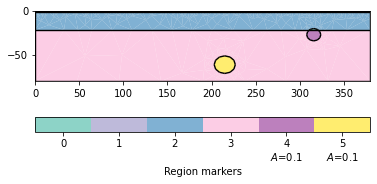

In [41]:
pg.show(two_ellipses_list[0])

In [42]:
pg.show(two_ellipses_list[1])

IndexError: list index out of range

#### Create a Dipole Dipole ('dd') measuring scheme with 4 electrodes. Put all electrode positions into the scheme to enforce mesh refinement. Also add further refinement nodes in a distance of 10% of electrode spacing to achieve sufficient numerical accuracy.

In [33]:
scheme = ert.createData(elecs = np.linspace(start=20, stop=360, num=64), schemeName='dd')

for p in scheme.sensorPositions():
    geom.createNode(p)
    geom.createNode(p + pg.RVector3(0, -0.1))

#### Create resistivity values. Linearly spaced out from 10 to 1200.

In [34]:
res_values = np.linspace(start=10, stop=1200, num=110).astype(int)

In [35]:
res_values

array([  10,   20,   31,   42,   53,   64,   75,   86,   97,  108,  119,
        130,  141,  151,  162,  173,  184,  195,  206,  217,  228,  239,
        250,  261,  272,  282,  293,  304,  315,  326,  337,  348,  359,
        370,  381,  392,  403,  413,  424,  435,  446,  457,  468,  479,
        490,  501,  512,  523,  534,  544,  555,  566,  577,  588,  599,
        610,  621,  632,  643,  654,  665,  675,  686,  697,  708,  719,
        730,  741,  752,  763,  774,  785,  796,  806,  817,  828,  839,
        850,  861,  872,  883,  894,  905,  916,  927,  937,  948,  959,
        970,  981,  992, 1003, 1014, 1025, 1036, 1047, 1058, 1068, 1079,
       1090, 1101, 1112, 1123, 1134, 1145, 1156, 1167, 1178, 1189, 1200])

#### Add resistivity to objects and layers

ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.124 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 413 max = 1112
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000112345569433 : 0.018994703485029477
Allocating memory for primary potential...... 0.011

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.373
Factorize (Cholmod) matrix ... 0.639
Factorize (Cholmod) matrix ... 0.857
Factorize (Cholmod) matrix ... 0.741
Factorize (Cholmod) matrix ... 0.824
Factorize (Cholmod) matrix ... 0.348
Factorize (Cholmod) matrix ... 0.572
Factorize (Cholmod) matrix ... 0.399
Factorize (Cholmod) matrix ... 0.468
Factorize (Cholmod) matrix ... 0.191
Facto

<Figure size 432x288 with 0 Axes>

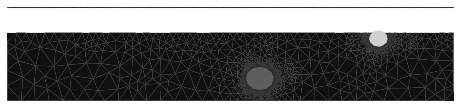

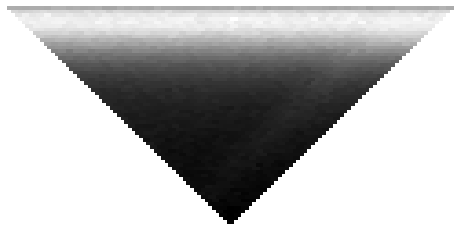

In [43]:
plt.rcParams['image.cmap']='gray'
plt.set_cmap('gray')
plt.set_cmap('gray')

counter = 665
    
for i in two_ellipses_list:
    
    mesh = mt.createMesh(i, quality = 34)
    
    object_res = random.choice(res_values)
    object_res_2 = random.choice(res_values)
    layer_1_res = random.choice(res_values)
    layer_2_res = random.choice(res_values)
    layer_3_res = random.choice(res_values)
    
    rhomap = [[0, object_res], [1, layer_1_res], [2, layer_2_res], [3, layer_3_res], [4, object_res], [5, object_res_2]]
    
    fig,ax=plt.subplots()
    pg.show(mesh, data=rhomap, label='Resistivity $(\Omega$m)', showMesh=False, showBoundary=False, colorBar=False,
           cMap='gray', vmin=10, vmax=1200, ax=ax)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig.set_size_inches(8,fig.get_figheight(), forward=True)
    
    fig.savefig('/home/gonde94/Documents/Synthetic_Data/True_Model_Two_Ellipses/'+str(counter)+'true_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    data = ert.simulate(mesh, res=rhomap, scheme=scheme, noiseLevel=1, noiseAbs=1e-6, seed=42)
    data.markInvalid(data('rhoa') < 0)
    data.removeInvalid()
    
    fig1,ax1=plt.subplots()
    pg.show(data, showMesh=False, showBoundary=False, colorBar=False, cMap='gray', vmin=10, vmax=1200, ax=ax1)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    ax1.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig1.set_size_inches(8,fig1.get_figheight(), forward=True)
    
    fig1.savefig('/home/gonde94/Documents/Synthetic_Data/App_res_two_ell/'+str(counter)+'app_res_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    counter = counter + 1

### Dataset 4: One Ellipse, One Rectangle

In [9]:
One_ell_one_rec_list = []

for i in range(1, 2):
    
    length = random.randint(20, 360)
    start_length = random.randint(20, 360)
    end_length = random.randint(20, 360)
    depth = random.randint(-70, -40)
    start_depth = random.randint(-30,-5)
    end_depth = random.randint(-30, -20)
    block_width = random.randint(5, 15)
    block_height = random.randint(5, 10)
    random_layer = random.randint(-10, -1)
    random_layer2 = random.randint(-40, -11)

    world = mt.createWorld(start=[0, 0], end=[380, -80], layers=[random_layer, random_layer2], worldMarker=True)
    circle = mt.createCircle(pos=[length, depth], radius=[block_width, block_height], 
                             marker=4, boundaryMarker=10, area=0.1)
    rectangle = mt.createRectangle(start=[start_length, start_depth], end=[end_length, end_depth],
                                   isclosed=True, marker=5, area=0.1)

    
    geom = world + circle + rectangle
    One_ell_one_rec_list.append(geom)

(<AxesSubplot:>, None)

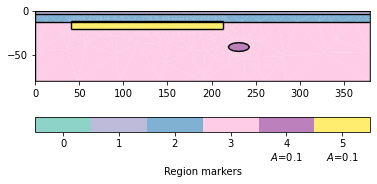

In [10]:
pg.show(One_ell_one_rec_list[0])

#### Create a Dipole Dipole ('dd') measuring scheme with 4 electrodes. Put all electrode positions into the scheme to enforce mesh refinement. Also add further refinement nodes in a distance of 10% of electrode spacing to achieve sufficient numerical accuracy.

In [5]:
scheme = ert.createData(elecs = np.linspace(start=20, stop=360, num=64), schemeName='dd')

for p in scheme.sensorPositions():
    geom.createNode(p)
    geom.createNode(p + pg.RVector3(0, -0.1))

#### Create resistivity values. Linearly spaced out from 10 to 1200. 

In [6]:
res_values = np.linspace(start=10, stop=1200, num=110).astype(int)

In [7]:
res_values

array([  10,   20,   31,   42,   53,   64,   75,   86,   97,  108,  119,
        130,  141,  151,  162,  173,  184,  195,  206,  217,  228,  239,
        250,  261,  272,  282,  293,  304,  315,  326,  337,  348,  359,
        370,  381,  392,  403,  413,  424,  435,  446,  457,  468,  479,
        490,  501,  512,  523,  534,  544,  555,  566,  577,  588,  599,
        610,  621,  632,  643,  654,  665,  675,  686,  697,  708,  719,
        730,  741,  752,  763,  774,  785,  796,  806,  817,  828,  839,
        850,  861,  872,  883,  894,  905,  916,  927,  937,  948,  959,
        970,  981,  992, 1003, 1014, 1025, 1036, 1047, 1058, 1068, 1079,
       1090, 1101, 1112, 1123, 1134, 1145, 1156, 1167, 1178, 1189, 1200])

#### Add resistivity values to objects and layers.

ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.313 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 119 max = 806
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000045400423341 : 0.015003788949775913
Allocating memory for primary potential...... 0.015

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 2.92
Factorize (Cholmod) matrix ... 1.374
Factorize (Cholmod) matrix ... 1.723
Factorize (Cholmod) matrix ... 1.646
Factorize (Cholmod) matrix ... 2.473
Factorize (Cholmod) matrix ... 3.014
Factorize (Cholmod) matrix ... 3.846
Factorize (Cholmod) matrix ... 1.611
Factorize (Cholmod) matrix ... 3.027
Factorize (Cholmod) matrix ... 2.01
Factoriz

<Figure size 432x288 with 0 Axes>

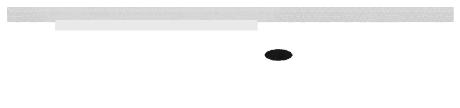

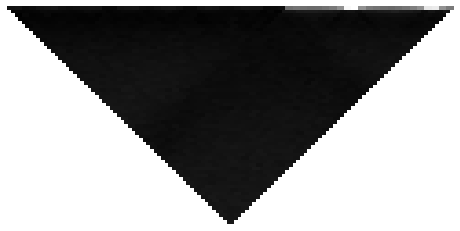

In [11]:
plt.rcParams['image.cmap']='gray'
plt.set_cmap('gray')
plt.set_cmap('gray')

counter = 644
    
for i in One_ell_one_rec_list:
    
    mesh = mt.createMesh(i, quality = 34)
    
    object_res = random.choice(res_values)
    object_res_2 = random.choice(res_values)
    layer_1_res = random.choice(res_values)
    layer_2_res = random.choice(res_values)
    layer_3_res = random.choice(res_values)
    
    rhomap = [[0, object_res_2], [1, layer_1_res], [2, layer_2_res], [3, layer_3_res], [4, object_res], [5, object_res_2]]
    
    fig,ax=plt.subplots()
    pg.show(mesh, data=rhomap, label='Resistivity $(\Omega$m)', showMesh=False, showBoundary=False, colorBar=False,
           cMap='gray', vmin=10, vmax=1200, ax=ax)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig.set_size_inches(8,fig.get_figheight(), forward=True)
    
    fig.savefig('/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Obj/'+str(counter)+'true_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    data = ert.simulate(mesh, res=rhomap, scheme=scheme, noiseLevel=1, noiseAbs=1e-6, seed=42)
    data.markInvalid(data('rhoa') < 0)
    data.removeInvalid()
    
    fig1,ax1=plt.subplots()
    pg.show(data, showMesh=False, showBoundary=False, colorBar=False, cMap='gray', vmin=10, vmax=1200, ax=ax1)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    ax1.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig1.set_size_inches(8,fig1.get_figheight(), forward=True)
    
    fig1.savefig('/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Obj/'+str(counter)+'app_res_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    counter = counter + 1

### Dataset 5: Two Rectangles

In [6]:
Two_Rec_list = []

for i in range(1, 11):
    
    start_length = random.randint(60, 220)
    start_length2 = random.randint(60, 220) #different lengths to keep them from getting too big
    end_length = random.randint(65, 240)
    end_length2 = random.randint(65, 240)
    start_depth = random.randint(-70, -45)
    start_depth2 = random.randint(-30, -5)
    end_depth = random.randint(-80, -45)
    end_depth2 = random.randint(-50, -10)
    random_layer = random.randint(-10, -1)
    random_layer2 = random.randint(-40, -11)

    world = mt.createWorld(start=[0, 0], end=[380, -80], layers=[random_layer, random_layer2], worldMarker=True)
    rectangle = mt.createRectangle(start=[start_length, start_depth], end=[end_length, end_depth],
                                   isclosed=True, marker=4, area=0.1)
    rectangle2 = mt.createRectangle(start=[start_length2, start_depth2], end=[end_length2, end_depth2],
                                   isclosed=True, marker=5, area=0.1)


    
    geom = world + rectangle + rectangle2
    Two_Rec_list.append(geom)

(<AxesSubplot:>, None)

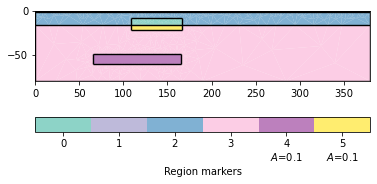

In [7]:
pg.show(Two_Rec_list[0])

(<AxesSubplot:>, None)

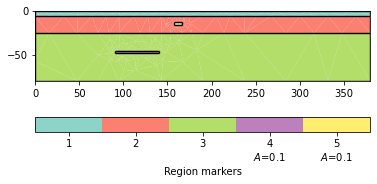

In [8]:
pg.show(Two_Rec_list[9])

#### Create a Dipole Dipole ('dd') measuring scheme with 4 electrodes. Put all electrode positions into the scheme to enforce mesh refinement. Also add further refinement nodes in a distance of 10% of electrode spacing to achieve sufficient numerical accuracy.

In [9]:
scheme = ert.createData(elecs = np.linspace(start=20, stop=360, num=64), schemeName='dd')

for p in scheme.sensorPositions():
    geom.createNode(p)
    geom.createNode(p + pg.RVector3(0, -0.1))

#### Create resistivity values. Linearly spaced out from 10 to 1200. 

In [10]:
res_values = np.linspace(start=10, stop=1200, num=110).astype(int)

#### Add resistivity values to layers and objects.

ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.423 s
FOP updating mesh dependencies ... 0 s


03/08/22 - 17:05:22 - pyGIMLi - INFO - Calculate geometric factors.


Obtaining geometric factors (analytical)
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000169003018628 : 0.02376789548679222
Calculating response for model: min = 293 max = 741
Allocating memory for primary potential...... 0.105

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 2.057
Factorize (Cholmod) matrix ... 3.05
Factorize (Cholmod) matrix ... 2.23
Factorize (Cholmod) matrix ... 2.612
Factorize (Cholmod) matrix ... 2.47
Factorize (Cholmod) matrix ... 1.737
Factorize (Cholmod) matrix ... 1.012
Factorize (Cholmod) matrix ... 0.577
Factorize (Cholmod) matrix ... 1.613
Factorize (Cholmod) matrix ... 1.242
Factorize (Cholmod) matrix ... 1.249
Factorize (Cholmod) matrix ... 0.954
Factorize (Cholmod) matrix ... 1.394
Factorize (Cholmod) matrix ... 1.346
Factorize (Cholmod) matrix ... 0.798
Factorize (Cholmod) matrix ... 2.212
Factoriz

03/08/22 - 17:06:02 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
03/08/22 - 17:06:04 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.199 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 10 max = 992
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000108698806376 : 0.1954760444745505
Allocating memory for primary potential...... 0.01

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 2.598
Factorize (Cholmod) matrix ... 1.876
Factorize (Cholmod) matrix ... 1.42
Factorize (Cholmod) matrix ... 0.984
Factorize (Cholmod) matrix ... 1.056
Factorize (Cholmod) matrix ... 1.275
Factorize (Cholmod) matrix ... 1.459
Factorize (Cholmod) matrix ... 2.948
Factorize (Cholmod) matrix ... 1.349
Factorize (Cholmod) matrix ... 1.255
Factorize (

03/08/22 - 17:06:35 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
03/08/22 - 17:06:37 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.161 s
FOP updating mesh dependencies ... 0 s
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000040413779145 : 0.014997678672909109
Calculating response for model: min = 697 max = 1123
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.085
Factorize (Cholmod) matrix ... 0.856
Factorize (Cholmod) matrix ... 0.683
Factorize (Cholmod) matrix ... 0.56
Factorize (Cholmod) matrix ... 0.6
Factorize (Cholmod) matrix ... 0.928
Factorize (Cholmod) matrix ... 0.839
Factorize (Cholmod) matrix ... 0.614
Factorize (Cholmod) matrix ... 0.632
Factorize (Cholmod) matrix ... 0.717
Factoriz

03/08/22 - 17:06:53 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
03/08/22 - 17:06:56 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.356 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 130 max = 654
Allocating memory for primary potential...... 0.017

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 3.57
Factorize (Cholmod) matrix ... 3.122
Factorize (Cholmod) matrix ... 1.705
Factorize (Cholmod) matrix ... 3.055
Factorize (Cholmod) matrix ... 2.032
Factorize (Cholmod) matrix ... 3.126
Factorize (Cholmod) matrix ... 2.662
Factorize (Cholmod) matrix ... 2.333
Factorize (Cholmod) matrix ... 2.291
Factorize (Cholmod) matrix ... 3.331
Factorize (Cholmod) matrix ... 3.184
Factorize (Cholmod) matrix ... 4.142
Factorize (Cholmod) matrix ... 2.517
Factorize (Cholmod) matrix ... 1.866
Factorize (Cholmod) matrix ... 2.43

03/08/22 - 17:09:16 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
03/08/22 - 17:09:20 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.4 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 151 max = 894
Allocating memory for primary potential...... 0.033

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 4.843
Factorize (Cholmod) matrix ... 4.056
Factorize (Cholmod) matrix ... 3.967
Factorize (Cholmod) matrix ... 3.229
Factorize (Cholmod) matrix ... 3.096
Factorize (Cholmod) matrix ... 3.13
Factorize (Cholmod) matrix ... 1.941
Factorize (Cholmod) matrix ... 3.767
Factorize (Cholmod) matrix ... 2.763
Factorize (Cholmod) matrix ... 3.626
Factorize (Cholmod) matrix ... 3.08
Factorize (Cholmod) matrix ... 5.17
Factorize (Cholmod) matrix ... 4.156
Factorize (Cholmod) matrix ... 2.866
Factorize (Cholmod) matrix ... 3.298
Fa

03/08/22 - 17:10:40 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
03/08/22 - 17:10:41 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.186 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 446 max = 806
Allocating memory for primary potential...... 0.01

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.462
Factorize (Cholmod) matrix ... 0.709
Factorize (Cholmod) matrix ... 1.279
Factorize (Cholmod) matrix ... 1.231
Factorize (Cholmod) matrix ... 1.171
Factorize (Cholmod) matrix ... 1.014
Factorize (Cholmod) matrix ... 0.788
Factorize (Cholmod) matrix ... 1.047
Factorize (Cholmod) matrix ... 0.96
Factorize (Cholmod) matrix ... 1.145
Factorize (Cholmod) matrix ... 1.209
Factorize (Cholmod) matrix ... 1.091
Factorize (Cholmod) matrix ... 0.984
Factorize (Cholmod) matrix ... 1.373
Factorize (Cholmod) matrix ... 1.322

03/08/22 - 17:11:09 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
03/08/22 - 17:11:14 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.529 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 468 max = 828
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000052934023526 : 0.018106052462649333
Allocating memory for primary potential...... 0.108

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 6.087
Factorize (Cholmod) matrix ... 5.838
Factorize (Cholmod) matrix ... 4.351
Factorize (Cholmod) matrix ... 6.217
Factorize (Cholmod) matrix ... 5.438
Factorize (Cholmod) matrix ... 4.374
Factorize (Cholmod) matrix ... 4.257
Factorize (Cholmod) matrix ... 4.993
Factorize (Cholmod) matrix ... 5.362
Factorize (Cholmod) matrix ... 4.549
Factor

03/08/22 - 17:14:02 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
03/08/22 - 17:14:03 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.134 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 119 max = 992
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.01000083186926299 : 0.01976802930157498
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.074
Factorize (Cholmod) matrix ... 0.07
Factorize (Cholmod) matrix ... 0.096
Factorize (Cholmod) matrix ... 0.121
Factorize (Cholmod) matrix ... 0.095
Factorize (Cholmod) matrix ... 0.069
Factorize (Cholmod) matrix ... 0.07
Factorize (Cholmod) matrix ... 0.074
Factorize (Cholmod) matrix ... 0.069
Factorize (Cholmod) matrix ... 0.069
Factorize 

/tmp/ipykernel_19706/3224328678.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1,ax1=plt.subplots()


<Figure size 432x288 with 0 Axes>

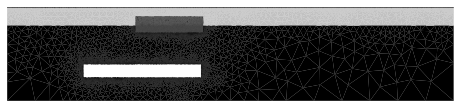

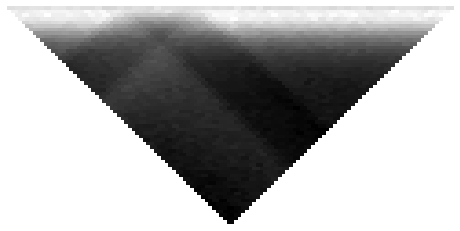

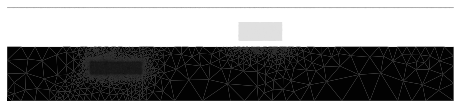

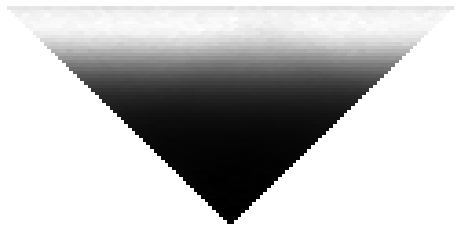

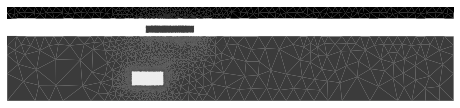

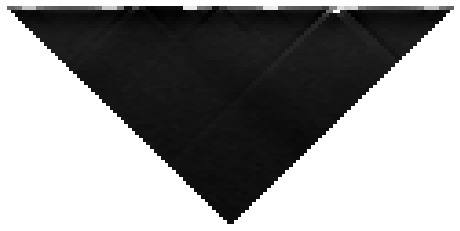

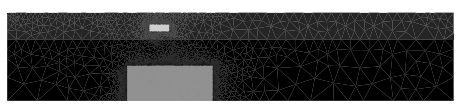

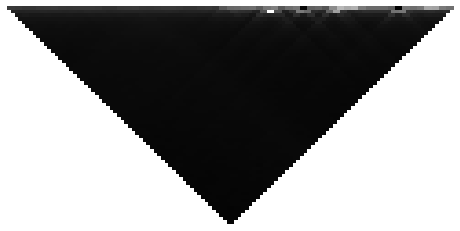

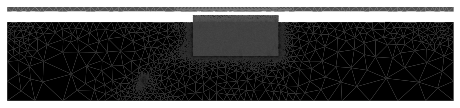

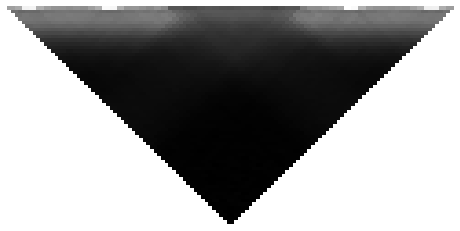

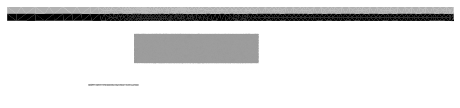

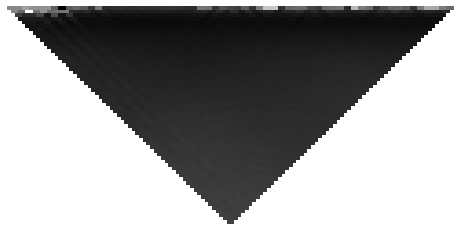

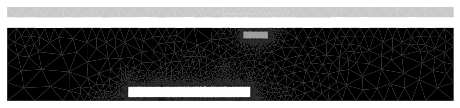

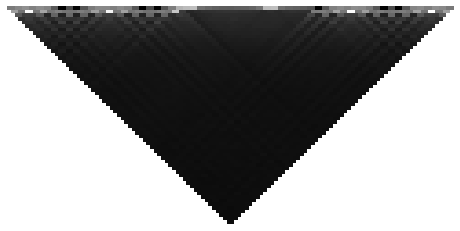

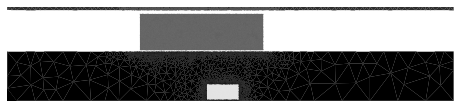

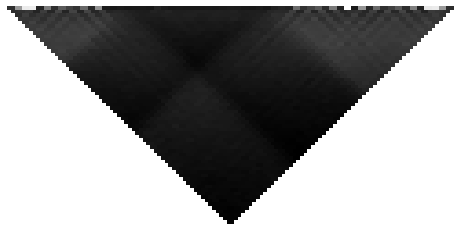

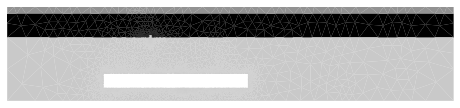

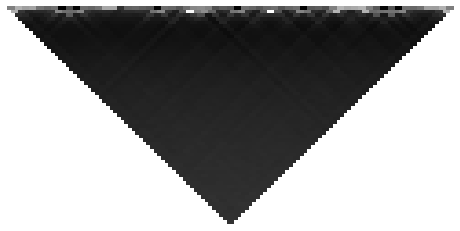

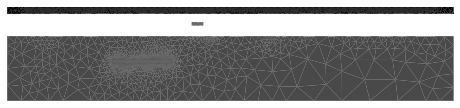

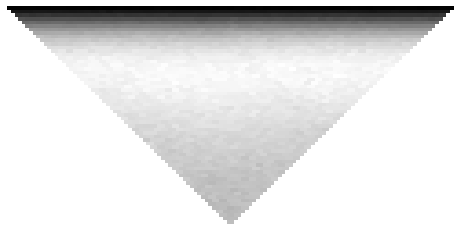

In [11]:
plt.rcParams['image.cmap']='gray'
plt.set_cmap('gray')
plt.set_cmap('gray')

counter = 508
    
for i in Two_Rec_list:
    
    mesh = mt.createMesh(i, quality = 34)
    
    object_res = random.choice(res_values)
    object_res_2 = random.choice(res_values)
    layer_1_res = random.choice(res_values)
    layer_2_res = random.choice(res_values)
    layer_3_res = random.choice(res_values)
    
    rhomap = [[0, object_res_2], [1, layer_1_res], [2, layer_2_res], [3, layer_3_res], [4, object_res], [5, object_res_2]]
    
    fig,ax=plt.subplots()
    pg.show(mesh, data=rhomap, label='Resistivity $(\Omega$m)', showMesh=False, showBoundary=False, colorBar=False,
           cMap='gray', vmin=10, vmax=1200, ax=ax)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig.set_size_inches(8,fig.get_figheight(), forward=True)
    
    fig.savefig('/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Rec/'+str(counter)+'true_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    data = ert.simulate(mesh, res=rhomap, scheme=scheme, noiseLevel=1, noiseAbs=1e-6, seed=42)
    data.markInvalid(data('rhoa') < 0)
    data.removeInvalid()
    
    fig1,ax1=plt.subplots()
    pg.show(data, showMesh=False, showBoundary=False, colorBar=False, cMap='gray', vmin=10, vmax=1200, ax=ax1)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    ax1.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig1.set_size_inches(8,fig1.get_figheight(), forward=True)
    
    fig1.savefig('/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Rec/'+str(counter)+'app_res_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    counter = counter + 1

### Dataset 6: Three Ellipses

In [29]:
three_ellipses_list = []

for i in range(1, 151):
    
    length = random.randint(20, 360)
    length_2 = random.randint(20, 360)
    length_3 = random.randint(20, 360)
    depth = random.randint(-40, -10)
    depth_2 = random.randint(-72, -40)
    depth_3 = random.randint(-72, -40)
    block_width = random.randint(5, 15)
    block_height = random.randint(5, 10)
    block_width_2 = random.randint(5, 15)
    block_height_2 = random.randint(5, 10)
    block_width_3 = random.randint(5, 15)
    block_height_3 = random.randint(5, 10)
    random_layer = random.randint(-10, -1)
    random_layer2 = random.randint(-40, -11)

    world = mt.createWorld(start=[0, 0], end=[380, -80], layers=[random_layer, random_layer2], worldMarker=True)
    circle = mt.createCircle(pos=[length, depth], radius=[block_width, block_height], 
                             marker=4, boundaryMarker=10, area=0.1)
    circle_two = mt.createCircle(pos=[length_2, depth_2], radius=[block_width_2, block_height_2],
                                marker=5, boundaryMarker=10, area=0.1)
    circle_three = mt.createCircle(pos=[length_3, depth_3], radius=[block_width_3, block_height_3],
                                  marker=6, boundaryMarker=10, area=0.1)
    
    geom = world + circle + circle_two + circle_three
    three_ellipses_list.append(geom)

(<AxesSubplot:>, None)

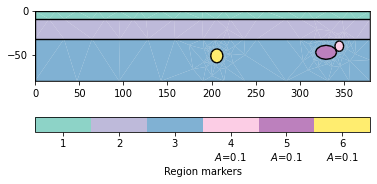

In [30]:
pg.show(three_ellipses_list[0])

(<AxesSubplot:>, None)

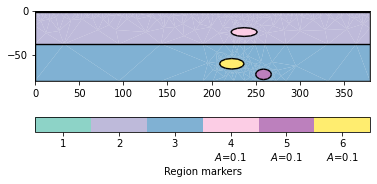

In [31]:
pg.show(three_ellipses_list[27])
#plt.savefig('Glitch in Pygimli Software')

#### Create a Dipole Dipole ('dd') measuring scheme with 4 electrodes. Put all electrode positions into the scheme to enforce mesh refinement. Also add further refinement nodes in a distance of 10% of electrode spacing to achieve sufficient numerical accuracy.

In [5]:
scheme = ert.createData(elecs = np.linspace(start=20, stop=360, num=64), schemeName='dd')

for p in scheme.sensorPositions():
    geom.createNode(p)
    geom.createNode(p + pg.RVector3(0, -0.1))

#### Create resistivity values. Linearly spaced out from 10 to 1200. 

In [6]:
res_values = np.linspace(start=10, stop=1200, num=110).astype(int)

#### Add resistivity values to layers and objects.

In [ ]:
plt.rcParams['image.cmap']='gray'
plt.set_cmap('gray')
plt.set_cmap('gray')

counter = 418
        
for i in three_ellipses_list:
    
    mesh = mt.createMesh(i, quality = 34)
    
    object_res = random.choice(res_values)
    object_res_2 = random.choice(res_values)
    object_res_3 = random.choice(res_values)
    layer_1_res = random.choice(res_values)
    layer_2_res = random.choice(res_values)
    layer_3_res = random.choice(res_values)
    
    rhomap = [[0, object_res], [1, layer_1_res], [2, layer_2_res], [3, layer_3_res], [4, object_res], 
              [5, object_res_2], [6, object_res_3]]
    
    fig,ax=plt.subplots()
    pg.show(mesh, data=rhomap, label='Resistivity $(\Omega$m)', showMesh=False, showBoundary=False, colorBar=False,
           cMap='gray', vmin=10, vmax=1200, ax=ax)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig.set_size_inches(8,fig.get_figheight(), forward=True)
    
    fig.savefig('/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Three_Ell/'+str(counter)+'true_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    data = ert.simulate(mesh, res=rhomap, scheme=scheme, noiseLevel=1, noiseAbs=1e-6, seed=42)
    data.markInvalid(data('rhoa') < 0)
    data.removeInvalid()
    
    fig1,ax1=plt.subplots()
    pg.show(data, showMesh=False, showBoundary=False, colorBar=False, cMap='gray', vmin=10, vmax=1200, ax=ax1)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    ax1.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig1.set_size_inches(8,fig1.get_figheight(), forward=True)
    
    fig1.savefig('/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Three_Ell/'+str(counter)+'app_res_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    counter = counter + 1

05/08/22 - 12:52:37 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 12:52:38 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.113 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 86 max = 1134
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.203
Factorize (Cholmod) matrix ... 0.551
Factorize (Cholmod) matrix ... 1.153
Factorize (Cholmod) matrix ... 0.209
Factorize (Cholmod) matrix ... 0.22
Factorize (Cholmod) matrix ... 0.211
Factorize (Cholmod) matrix ... 0.206
Factorize (Cholmod) matrix ... 0.29
Factorize (Cholmod) matrix ... 0.39
Factorize (Cholmod) matrix ... 0.23
Factorize (Cholmod) matrix ... 0.359
Factorize (Cholmod) matrix ... 0.331
Factorize (Cholmod) matrix ... 1.339
Factorize (Cholmod) matrix ... 0.563
Factorize (Cholmod) matrix ... 0.672
F

05/08/22 - 12:53:32 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 12:53:33 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.162 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 31 max = 1189
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.898
Factorize (Cholmod) matrix ... 1.36
Factorize (Cholmod) matrix ... 0.84
Factorize (Cholmod) matrix ... 1.389
Factorize (Cholmod) matrix ... 1.897
Factorize (Cholmod) matrix ... 0.358
Factorize (Cholmod) matrix ... 1.207
Factorize (Cholmod) matrix ... 1.766
Factorize (Cholmod) matrix ... 1.204
Factorize (Cholmod) matrix ... 0.775
Factorize (Cholmod) matrix ... 0.764
Factorize (Cholmod) matrix ... 0.767
Factorize (Cholmod) matrix ... 0.689
Factorize (Cholmod) matrix ... 0.851
Factorize (Cholmod) matrix ... 0.761

05/08/22 - 12:55:54 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 12:55:55 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.074 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 97 max = 948
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000067772618486 : 0.05208134703733365
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.365
Factorize (Cholmod) matrix ... 0.409
Factorize (Cholmod) matrix ... 0.455
Factorize (Cholmod) matrix ... 0.374
Factorize (Cholmod) matrix ... 0.349
Factorize (Cholmod) matrix ... 0.155
Factorize (Cholmod) matrix ... 0.22
Factorize (Cholmod) matrix ... 0.166
Factorize (Cholmod) matrix ... 0.17
Factorize (Cholmod) matrix ... 0.201
Factorize 

/tmp/ipykernel_11144/1925948328.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1,ax1=plt.subplots()


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.13 s
FOP updating mesh dependencies ... 0 s
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000065589470827 : 0.014218564744576574
Calculating response for model: min = 413 max = 1178
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.74
Factorize (Cholmod) matrix ... 0.354
Factorize (Cholmod) matrix ... 0.237
Factorize (Cholmod) matrix ... 0.234
Factorize (Cholmod) matrix ... 0.224
Factorize (Cholmod) matrix ... 0.233
Factorize (Cholmod) matrix ... 0.315
Factorize (Cholmod) matrix ... 0.335
Factorize (Cholmod) matrix ... 0.401
Factorize (Cholmod) matrix ... 0.238
Factori

05/08/22 - 12:56:15 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 12:56:17 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.183 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 119 max = 1189
Allocating memory for primary potential...... 0.013

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.928
Factorize (Cholmod) matrix ... 0.827
Factorize (Cholmod) matrix ... 1.058
Factorize (Cholmod) matrix ... 0.579
Factorize (Cholmod) matrix ... 0.863
Factorize (Cholmod) matrix ... 0.645
Factorize (Cholmod) matrix ... 0.737
Factorize (Cholmod) matrix ... 0.527
Factorize (Cholmod) matrix ... 0.519
Factorize (Cholmod) matrix ... 0.473
Factorize (Cholmod) matrix ... 1.417
Factorize (Cholmod) matrix ... 0.833
Factorize (Cholmod) matrix ... 0.962
Factorize (Cholmod) matrix ... 0.562
Factorize (Cholmod) matrix ... 0.

05/08/22 - 12:56:37 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 12:56:39 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.183 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 31 max = 937
Allocating memory for primary potential...... 0.015

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.764
Factorize (Cholmod) matrix ... 0.841
Factorize (Cholmod) matrix ... 0.667
Factorize (Cholmod) matrix ... 1.828
Factorize (Cholmod) matrix ... 1.116
Factorize (Cholmod) matrix ... 0.792
Factorize (Cholmod) matrix ... 1.263
Factorize (Cholmod) matrix ... 0.986
Factorize (Cholmod) matrix ... 1.522
Factorize (Cholmod) matrix ... 0.991
Factorize (Cholmod) matrix ... 1.086
Factorize (Cholmod) matrix ... 0.617
Factorize (Cholmod) matrix ... 0.958
Factorize (Cholmod) matrix ... 1.28
Factorize (Cholmod) matrix ... 1.211

05/08/22 - 12:57:06 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 12:57:08 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.229 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 228 max = 785
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000039825968192 : 0.01585072441445063
Allocating memory for primary potential...... 0.02

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.338
Factorize (Cholmod) matrix ... 1.174
Factorize (Cholmod) matrix ... 0.306
Factorize (Cholmod) matrix ... 0.967
Factorize (Cholmod) matrix ... 0.41
Factorize (Cholmod) matrix ... 0.272
Factorize (Cholmod) matrix ... 0.263
Factorize (Cholmod) matrix ... 0.263
Factorize (Cholmod) matrix ... 0.263
Factorize (Cholmod) matrix ... 0.263
Factorize

05/08/22 - 12:57:19 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 12:57:20 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.147 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 97 max = 1025
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000127550484168 : 0.017323655000791794
Allocating memory for primary potential...... 0.005

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.387
Factorize (Cholmod) matrix ... 0.327
Factorize (Cholmod) matrix ... 0.257
Factorize (Cholmod) matrix ... 0.514
Factorize (Cholmod) matrix ... 0.578
Factorize (Cholmod) matrix ... 0.604
Factorize (Cholmod) matrix ... 0.236
Factorize (Cholmod) matrix ... 0.2
Factorize (Cholmod) matrix ... 0.21
Factorize (Cholmod) matrix ... 0.195
Factorize

05/08/22 - 12:57:57 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 12:57:58 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.111 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 315 max = 1167
Allocating memory for primary potential...... 0.005

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.827
Factorize (Cholmod) matrix ... 0.371
Factorize (Cholmod) matrix ... 0.434
Factorize (Cholmod) matrix ... 0.505
Factorize (Cholmod) matrix ... 0.467
Factorize (Cholmod) matrix ... 0.191
Factorize (Cholmod) matrix ... 0.266
Factorize (Cholmod) matrix ... 0.242
Factorize (Cholmod) matrix ... 0.423
Factorize (Cholmod) matrix ... 0.219
Factorize (Cholmod) matrix ... 0.212
Factorize (Cholmod) matrix ... 0.195
Factorize (Cholmod) matrix ... 0.195
Factorize (Cholmod) matrix ... 0.249
Factorize (Cholmod) matrix ... 0.

05/08/22 - 12:58:09 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 12:58:10 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.196 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 20 max = 828
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000157045769663 : 0.042347504688842415
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.333
Factorize (Cholmod) matrix ... 1.146
Factorize (Cholmod) matrix ... 0.892
Factorize (Cholmod) matrix ... 0.902
Factorize (Cholmod) matrix ... 0.998
Factorize (Cholmod) matrix ... 0.771
Factorize (Cholmod) matrix ... 0.68
Factorize (Cholmod) matrix ... 0.79
Factorize (Cholmod) matrix ... 1.318
Factorize (Cholmod) matrix ... 0.753
Factorize

05/08/22 - 12:59:25 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 12:59:26 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.19 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 31 max = 1047
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.01000005314291198 : 0.019386661085184616
Allocating memory for primary potential...... 0.012

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.874
Factorize (Cholmod) matrix ... 0.916
Factorize (Cholmod) matrix ... 0.843
Factorize (Cholmod) matrix ... 0.741
Factorize (Cholmod) matrix ... 0.823
Factorize (Cholmod) matrix ... 1.678
Factorize (Cholmod) matrix ... 0.809
Factorize (Cholmod) matrix ... 0.867
Factorize (Cholmod) matrix ... 0.805
Factorize (Cholmod) matrix ... 0.733
Factoriz

05/08/22 - 13:00:34 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:00:36 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.211 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 141 max = 927
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000185479601367 : 0.015416425662625365
Allocating memory for primary potential...... 0.009

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.987
Factorize (Cholmod) matrix ... 0.648
Factorize (Cholmod) matrix ... 0.479
Factorize (Cholmod) matrix ... 0.529
Factorize (Cholmod) matrix ... 0.363
Factorize (Cholmod) matrix ... 1.344
Factorize (Cholmod) matrix ... 1.296
Factorize (Cholmod) matrix ... 0.621
Factorize (Cholmod) matrix ... 0.481
Factorize (Cholmod) matrix ... 0.683
Factor

05/08/22 - 13:01:12 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:01:14 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.15 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 20 max = 1156
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000636841235738 : 0.03572504026984412
Allocating memory for primary potential...... 0.01

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.719
Factorize (Cholmod) matrix ... 1.295
Factorize (Cholmod) matrix ... 0.483
Factorize (Cholmod) matrix ... 0.477
Factorize (Cholmod) matrix ... 0.49
Factorize (Cholmod) matrix ... 0.503
Factorize (Cholmod) matrix ... 0.482
Factorize (Cholmod) matrix ... 0.497
Factorize (Cholmod) matrix ... 0.681
Factorize (Cholmod) matrix ... 0.426
Factorize 

05/08/22 - 13:01:31 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:01:32 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.185 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 184 max = 937
Allocating memory for primary potential...... 0.012

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.428
Factorize (Cholmod) matrix ... 0.442
Factorize (Cholmod) matrix ... 0.772
Factorize (Cholmod) matrix ... 1.194
Factorize (Cholmod) matrix ... 0.693
Factorize (Cholmod) matrix ... 0.466
Factorize (Cholmod) matrix ... 0.689
Factorize (Cholmod) matrix ... 0.604
Factorize (Cholmod) matrix ... 0.546
Factorize (Cholmod) matrix ... 0.439
Factorize (Cholmod) matrix ... 0.839
Factorize (Cholmod) matrix ... 0.568
Factorize (Cholmod) matrix ... 0.92
Factorize (Cholmod) matrix ... 1.275
Factorize (Cholmod) matrix ... 0.74

05/08/22 - 13:01:51 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:01:53 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.249 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 42 max = 1167
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.113
Factorize (Cholmod) matrix ... 0.488
Factorize (Cholmod) matrix ... 0.709
Factorize (Cholmod) matrix ... 0.707
Factorize (Cholmod) matrix ... 0.652
Factorize (Cholmod) matrix ... 0.54
Factorize (Cholmod) matrix ... 0.555
Factorize (Cholmod) matrix ... 0.599
Factorize (Cholmod) matrix ... 0.392
Factorize (Cholmod) matrix ... 0.555
Factorize (Cholmod) matrix ... 0.579
Factorize (Cholmod) matrix ... 0.601
Factorize (Cholmod) matrix ... 0.912
Factorize (Cholmod) matrix ... 0.244
Factorize (Cholmod) matrix ... 0.63

05/08/22 - 13:02:44 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:02:45 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.089 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 239 max = 1090
Allocating memory for primary potential...... 0.004

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.056
Factorize (Cholmod) matrix ... 0.048
Factorize (Cholmod) matrix ... 0.046
Factorize (Cholmod) matrix ... 0.046
Factorize (Cholmod) matrix ... 0.047
Factorize (Cholmod) matrix ... 0.046
Factorize (Cholmod) matrix ... 0.09
Factorize (Cholmod) matrix ... 0.068
Factorize (Cholmod) matrix ... 0.067
Factorize (Cholmod) matrix ... 0.057
Factorize (Cholmod) matrix ... 0.046
Factorize (Cholmod) matrix ... 0.052
Factorize (Cholmod) matrix ... 0.053
Factorize (Cholmod) matrix ... 0.053
Factorize (Cholmod) matrix ... 0.0

05/08/22 - 13:03:22 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:03:23 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.229 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 42 max = 806
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000247157181404 : 0.11228185383735478
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.546
Factorize (Cholmod) matrix ... 0.804
Factorize (Cholmod) matrix ... 0.249
Factorize (Cholmod) matrix ... 0.376
Factorize (Cholmod) matrix ... 0.539
Factorize (Cholmod) matrix ... 0.684
Factorize (Cholmod) matrix ... 1.097
Factorize (Cholmod) matrix ... 0.245
Factorize (Cholmod) matrix ... 0.422
Factorize (Cholmod) matrix ... 0.311
Factoriz

05/08/22 - 13:03:54 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:03:55 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.098 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 184 max = 1178
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.501
Factorize (Cholmod) matrix ... 0.92
Factorize (Cholmod) matrix ... 0.381
Factorize (Cholmod) matrix ... 0.244
Factorize (Cholmod) matrix ... 0.278
Factorize (Cholmod) matrix ... 0.393
Factorize (Cholmod) matrix ... 0.497
Factorize (Cholmod) matrix ... 0.586
Factorize (Cholmod) matrix ... 0.393
Factorize (Cholmod) matrix ... 0.297
Factorize (Cholmod) matrix ... 0.177
Factorize (Cholmod) matrix ... 0.178
Factorize (Cholmod) matrix ... 0.173
Factorize (Cholmod) matrix ... 0.177
Factorize (Cholmod) matrix ... 0.1

05/08/22 - 13:04:05 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:04:06 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.156 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 108 max = 1068
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000037809944198 : 0.016788919424475763
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.564
Factorize (Cholmod) matrix ... 0.288
Factorize (Cholmod) matrix ... 0.209
Factorize (Cholmod) matrix ... 0.218
Factorize (Cholmod) matrix ... 0.215
Factorize (Cholmod) matrix ... 0.358
Factorize (Cholmod) matrix ... 0.5
Factorize (Cholmod) matrix ... 0.387
Factorize (Cholmod) matrix ... 0.195
Factorize (Cholmod) matrix ... 0.233
Factori

05/08/22 - 13:04:39 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:04:40 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.1 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 42 max = 719
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000163389883797 : 0.10962401189152031
Allocating memory for primary potential...... 0.005

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.535
Factorize (Cholmod) matrix ... 0.377
Factorize (Cholmod) matrix ... 0.281
Factorize (Cholmod) matrix ... 0.587
Factorize (Cholmod) matrix ... 0.308
Factorize (Cholmod) matrix ... 0.449
Factorize (Cholmod) matrix ... 0.407
Factorize (Cholmod) matrix ... 0.404
Factorize (Cholmod) matrix ... 0.185
Factorize (Cholmod) matrix ... 0.191
Factorize 

05/08/22 - 13:04:49 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:04:51 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.181 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 555 max = 1112
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000092846870602 : 0.01371732251344598
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.641
Factorize (Cholmod) matrix ... 1.225
Factorize (Cholmod) matrix ... 0.82
Factorize (Cholmod) matrix ... 0.667
Factorize (Cholmod) matrix ... 0.638
Factorize (Cholmod) matrix ... 0.61
Factorize (Cholmod) matrix ... 1
Factorize (Cholmod) matrix ... 0.593
Factorize (Cholmod) matrix ... 0.992
Factorize (Cholmod) matrix ... 1.079
Factorize (C

05/08/22 - 13:05:34 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:05:35 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.194 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 337 max = 883
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.088
Factorize (Cholmod) matrix ... 0.513
Factorize (Cholmod) matrix ... 0.379
Factorize (Cholmod) matrix ... 0.685
Factorize (Cholmod) matrix ... 0.759
Factorize (Cholmod) matrix ... 0.655
Factorize (Cholmod) matrix ... 1.135
Factorize (Cholmod) matrix ... 0.303
Factorize (Cholmod) matrix ... 0.299
Factorize (Cholmod) matrix ... 0.491
Factorize (Cholmod) matrix ... 0.28
Factorize (Cholmod) matrix ... 0.713
Factorize (Cholmod) matrix ... 1.419
Factorize (Cholmod) matrix ... 0.788
Factorize (Cholmod) matrix ... 1.00

05/08/22 - 13:06:15 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:06:17 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.198 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 97 max = 1014
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000039118245664 : 0.014084659877947717
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.145
Factorize (Cholmod) matrix ... 1.058
Factorize (Cholmod) matrix ... 0.763
Factorize (Cholmod) matrix ... 0.415
Factorize (Cholmod) matrix ... 0.833
Factorize (Cholmod) matrix ... 0.75
Factorize (Cholmod) matrix ... 1.053
Factorize (Cholmod) matrix ... 0.825
Factorize (Cholmod) matrix ... 0.81
Factorize (Cholmod) matrix ... 1.29
Factorize

05/08/22 - 13:06:39 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:06:40 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.136 s
FOP updating mesh dependencies ... 0 s
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000066704280202 : 0.017926907788877407
Calculating response for model: min = 42 max = 1156
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.625
Factorize (Cholmod) matrix ... 0.85
Factorize (Cholmod) matrix ... 0.496
Factorize (Cholmod) matrix ... 0.538
Factorize (Cholmod) matrix ... 0.24
Factorize (Cholmod) matrix ... 0.285
Factorize (Cholmod) matrix ... 0.624
Factorize (Cholmod) matrix ... 0.417
Factorize (Cholmod) matrix ... 0.884
Factorize (Cholmod) matrix ... 0.484
Factoriz

05/08/22 - 13:06:52 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:06:53 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.095 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 20 max = 1079
Allocating memory for primary potential...... 0.005

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.351
Factorize (Cholmod) matrix ... 0.318
Factorize (Cholmod) matrix ... 0.705
Factorize (Cholmod) matrix ... 0.432
Factorize (Cholmod) matrix ... 0.208
Factorize (Cholmod) matrix ... 0.183
Factorize (Cholmod) matrix ... 0.838
Factorize (Cholmod) matrix ... 0.723
Factorize (Cholmod) matrix ... 0.203
Factorize (Cholmod) matrix ... 0.192
Factorize (Cholmod) matrix ... 0.217
Factorize (Cholmod) matrix ... 0.188
Factorize (Cholmod) matrix ... 0.183
Factorize (Cholmod) matrix ... 0.48
Factorize (Cholmod) matrix ... 0.18

05/08/22 - 13:07:03 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:07:05 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.194 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 86 max = 796
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000124963512746 : 0.022937405611792916
Allocating memory for primary potential...... 0.009

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.917
Factorize (Cholmod) matrix ... 0.455
Factorize (Cholmod) matrix ... 0.627
Factorize (Cholmod) matrix ... 0.863
Factorize (Cholmod) matrix ... 0.813
Factorize (Cholmod) matrix ... 0.824
Factorize (Cholmod) matrix ... 0.781
Factorize (Cholmod) matrix ... 0.619
Factorize (Cholmod) matrix ... 1.003
Factorize (Cholmod) matrix ... 1.37
Factoriz

05/08/22 - 13:07:26 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:07:27 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.144 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 20 max = 1189
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000079821250571 : 0.022608489398568497
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.644
Factorize (Cholmod) matrix ... 0.337
Factorize (Cholmod) matrix ... 0.196
Factorize (Cholmod) matrix ... 0.277
Factorize (Cholmod) matrix ... 0.383
Factorize (Cholmod) matrix ... 0.3
Factorize (Cholmod) matrix ... 0.286
Factorize (Cholmod) matrix ... 0.578
Factorize (Cholmod) matrix ... 0.58
Factorize (Cholmod) matrix ... 0.246
Factorize

05/08/22 - 13:08:21 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:08:22 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.124 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 184 max = 1079
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.492
Factorize (Cholmod) matrix ... 0.709
Factorize (Cholmod) matrix ... 0.519
Factorize (Cholmod) matrix ... 0.393
Factorize (Cholmod) matrix ... 0.258
Factorize (Cholmod) matrix ... 0.419
Factorize (Cholmod) matrix ... 0.531
Factorize (Cholmod) matrix ... 0.264
Factorize (Cholmod) matrix ... 0.307
Factorize (Cholmod) matrix ... 0.288
Factorize (Cholmod) matrix ... 0.219
Factorize (Cholmod) matrix ... 0.22
Factorize (Cholmod) matrix ... 0.544
Factorize (Cholmod) matrix ... 0.381
Factorize (Cholmod) matrix ... 0.2

05/08/22 - 13:08:33 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:08:34 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.148 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 523 max = 1178
Allocating memory for primary potential...... 0.005

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.573
Factorize (Cholmod) matrix ... 0.463
Factorize (Cholmod) matrix ... 0.228
Factorize (Cholmod) matrix ... 0.274
Factorize (Cholmod) matrix ... 0.616
Factorize (Cholmod) matrix ... 0.201
Factorize (Cholmod) matrix ... 0.236
Factorize (Cholmod) matrix ... 0.232
Factorize (Cholmod) matrix ... 0.183
Factorize (Cholmod) matrix ... 0.191
Factorize (Cholmod) matrix ... 0.188
Factorize (Cholmod) matrix ... 0.225
Factorize (Cholmod) matrix ... 0.235
Factorize (Cholmod) matrix ... 0.191
Factorize (Cholmod) matrix ... 0.

05/08/22 - 13:08:55 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:08:56 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.179 s
FOP updating mesh dependencies ... 0 s
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100Calculating response for model: min = 130 max = 959

Data error estimate (min:max)  0.010000052523131684 : 0.026061888570399247
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.017
Factorize (Cholmod) matrix ... 0.293
Factorize (Cholmod) matrix ... 0.31
Factorize (Cholmod) matrix ... 1.052
Factorize (Cholmod) matrix ... 0.341
Factorize (Cholmod) matrix ... 0.355
Factorize (Cholmod) matrix ... 1.041
Factorize (Cholmod) matrix ... 0.274
Factorize (Cholmod) matrix ... 0.327
Factorize (Cholmod) matrix ... 0.296
Factori

ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.156 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 337 max = 905
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000143293172151 : 0.014889338033957804
Allocating memory for primary potential...... 0.01

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.746
Factorize (Cholmod) matrix ... 0.302
Factorize (Cholmod) matrix ... 0.386
Factorize (Cholmod) matrix ... 0.333
Factorize (Cholmod) matrix ... 0.602
Factorize (Cholmod) matrix ... 1.073
Factorize (Cholmod) matrix ... 0.238
Factorize (Cholmod) matrix ... 0.237
Factorize (Cholmod) matrix ... 0.268
Factorize (Cholmod) matrix ... 0.864
Factori

05/08/22 - 13:11:00 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:11:01 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.191 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 42 max = 1003
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000123794689732 : 0.016534317536954828
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.518
Factorize (Cholmod) matrix ... 0.36
Factorize (Cholmod) matrix ... 0.54
Factorize (Cholmod) matrix ... 0.757
Factorize (Cholmod) matrix ... 0.403
Factorize (Cholmod) matrix ... 0.226
Factorize (Cholmod) matrix ... 0.245
Factorize (Cholmod) matrix ... 0.225
Factorize (Cholmod) matrix ... 0.24
Factorize (Cholmod) matrix ... 0.312
Factorize

05/08/22 - 13:11:33 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:11:35 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.118 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 359 max = 1036
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.729
Factorize (Cholmod) matrix ... 0.267
Factorize (Cholmod) matrix ... 0.249
Factorize (Cholmod) matrix ... 0.842
Factorize (Cholmod) matrix ... 0.565
Factorize (Cholmod) matrix ... 0.581
Factorize (Cholmod) matrix ... 0.354
Factorize (Cholmod) matrix ... 0.233
Factorize (Cholmod) matrix ... 0.222
Factorize (Cholmod) matrix ... 0.23
Factorize (Cholmod) matrix ... 0.229
Factorize (Cholmod) matrix ... 0.289
Factorize (Cholmod) matrix ... 0.236
Factorize (Cholmod) matrix ... 0.231
Factorize (Cholmod) matrix ... 0.2

05/08/22 - 13:12:45 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:12:46 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.197 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 370 max = 1178
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000029172457578 : 0.020805966176646304
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.262
Factorize (Cholmod) matrix ... 0.798
Factorize (Cholmod) matrix ... 0.444
Factorize (Cholmod) matrix ... 0.684
Factorize (Cholmod) matrix ... 1.114
Factorize (Cholmod) matrix ... 0.952
Factorize (Cholmod) matrix ... 1.193
Factorize (Cholmod) matrix ... 0.884
Factorize (Cholmod) matrix ... 1.069
Factorize (Cholmod) matrix ... 1.237
Facto

05/08/22 - 13:13:30 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:13:31 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.13 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 424 max = 1101
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000161648463273 : 0.018102247270271703
Allocating memory for primary potential...... 0.009

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.926
Factorize (Cholmod) matrix ... 1.275
Factorize (Cholmod) matrix ... 0.202
Factorize (Cholmod) matrix ... 0.203
Factorize (Cholmod) matrix ... 0.596
Factorize (Cholmod) matrix ... 0.901
Factorize (Cholmod) matrix ... 0.28
Factorize (Cholmod) matrix ... 0.231
Factorize (Cholmod) matrix ... 0.199
Factorize (Cholmod) matrix ... 0.209
Factori

05/08/22 - 13:13:43 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:13:44 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.056 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 53 max = 1036
Allocating memory for primary potential...... 0.003

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.039
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.038
Factorize (Cholmod) matrix ... 0.064
Factorize (Cholmod) matrix ... 0.046
Factorize (Cholmod) matrix ... 0.045
Factorize (Cholmod) matrix ... 0.0

05/08/22 - 13:13:46 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:13:48 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.14 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 75 max = 1145
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000386559726493 : 0.016920961288764802
Allocating memory for primary potential...... 0.009

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.92
Factorize (Cholmod) matrix ... 0.25
Factorize (Cholmod) matrix ... 1.064
Factorize (Cholmod) matrix ... 0.636
Factorize (Cholmod) matrix ... 0.26
Factorize (Cholmod) matrix ... 0.822
Factorize (Cholmod) matrix ... 0.805
Factorize (Cholmod) matrix ... 0.243
Factorize (Cholmod) matrix ... 0.436
Factorize (Cholmod) matrix ... 0.597
Factorize 

05/08/22 - 13:14:31 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:14:32 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.22 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 31 max = 1134
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.985
Factorize (Cholmod) matrix ... 0.752
Factorize (Cholmod) matrix ... 0.83
Factorize (Cholmod) matrix ... 0.777
Factorize (Cholmod) matrix ... 0.744
Factorize (Cholmod) matrix ... 0.563
Factorize (Cholmod) matrix ... 1.114
Factorize (Cholmod) matrix ... 0.765
Factorize (Cholmod) matrix ... 0.543
Factorize (Cholmod) matrix ... 0.62
Factorize (Cholmod) matrix ... 1.006
Factorize (Cholmod) matrix ... 0.764
Factorize (Cholmod) matrix ... 0.769
Factorize (Cholmod) matrix ... 0.364
Factorize (Cholmod) matrix ... 0.26
F

05/08/22 - 13:14:50 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:14:51 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.265 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 75 max = 817
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000309603873945 : 0.030087319613474398
Allocating memory for primary potential...... 0.013

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.613
Factorize (Cholmod) matrix ... 0.62
Factorize (Cholmod) matrix ... 0.852
Factorize (Cholmod) matrix ... 1.224
Factorize (Cholmod) matrix ... 0.938
Factorize (Cholmod) matrix ... 1.074
Factorize (Cholmod) matrix ... 1.433
Factorize (Cholmod) matrix ... 2.303
Factorize (Cholmod) matrix ... 0.669
Factorize (Cholmod) matrix ... 0.702
Factoriz

05/08/22 - 13:15:16 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:15:17 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.208 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 53 max = 937
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.01000003346424498 : 0.015048840898770312
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.32
Factorize (Cholmod) matrix ... 0.896
Factorize (Cholmod) matrix ... 0.587
Factorize (Cholmod) matrix ... 0.75
Factorize (Cholmod) matrix ... 1.349
Factorize (Cholmod) matrix ... 0.817
Factorize (Cholmod) matrix ... 1.225
Factorize (Cholmod) matrix ... 1.369
Factorize (Cholmod) matrix ... 0.67
Factorize (Cholmod) matrix ... 1.591
Factorize (

05/08/22 - 13:15:42 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:15:43 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.162 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 217 max = 752
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.198
Factorize (Cholmod) matrix ... 0.796
Factorize (Cholmod) matrix ... 1.664
Factorize (Cholmod) matrix ... 0.63
Factorize (Cholmod) matrix ... 0.409
Factorize (Cholmod) matrix ... 1.025
Factorize (Cholmod) matrix ... 0.815
Factorize (Cholmod) matrix ... 1.12
Factorize (Cholmod) matrix ... 0.817
Factorize (Cholmod) matrix ... 0.714
Factorize (Cholmod) matrix ... 0.56
Factorize (Cholmod) matrix ... 1.056
Factorize (Cholmod) matrix ... 1.32
Factorize (Cholmod) matrix ... 1.347
Factorize (Cholmod) matrix ... 0.885
F

ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.133 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 130 max = 1068
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.213
Factorize (Cholmod) matrix ... 0.377
Factorize (Cholmod) matrix ... 0.546
Factorize (Cholmod) matrix ... 0.403
Factorize (Cholmod) matrix ... 0.488
Factorize (Cholmod) matrix ... 0.624
Factorize (Cholmod) matrix ... 0.472
Factorize (Cholmod) matrix ... 0.431
Factorize (Cholmod) matrix ... 0.578
Factorize (Cholmod) matrix ... 0.609
Factorize (Cholmod) matrix ... 0.631
Factorize (Cholmod) matrix ... 0.936
Factorize (Cholmod) matrix ... 0.305
Factorize (Cholmod) matrix ... 0.617
Factorize (Cholmod) matrix ... 0.

05/08/22 - 13:17:59 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:18:00 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.088 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 31 max = 1200
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000054084182478 : 0.014071232171774768
Allocating memory for primary potential...... 0.005

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.372
Factorize (Cholmod) matrix ... 0.674
Factorize (Cholmod) matrix ... 0.441
Factorize (Cholmod) matrix ... 0.371
Factorize (Cholmod) matrix ... 0.216
Factorize (Cholmod) matrix ... 0.192
Factorize (Cholmod) matrix ... 0.164
Factorize (Cholmod) matrix ... 0.211
Factorize (Cholmod) matrix ... 0.603
Factorize (Cholmod) matrix ... 0.543
Factor

05/08/22 - 13:18:10 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:18:11 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.169 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 108 max = 1123
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000247091967443 : 0.01737582424903633
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.448
Factorize (Cholmod) matrix ... 0.805
Factorize (Cholmod) matrix ... 1.021
Factorize (Cholmod) matrix ... 0.294
Factorize (Cholmod) matrix ... 0.395
Factorize (Cholmod) matrix ... 0.269
Factorize (Cholmod) matrix ... 0.284
Factorize (Cholmod) matrix ... 0.296
Factorize (Cholmod) matrix ... 0.748
Factorize (Cholmod) matrix ... 0.527
Factor

05/08/22 - 13:18:26 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:18:27 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.112 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 108 max = 1200
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.737
Factorize (Cholmod) matrix ... 0.348
Factorize (Cholmod) matrix ... 0.522
Factorize (Cholmod) matrix ... 0.945
Factorize (Cholmod) matrix ... 0.222
Factorize (Cholmod) matrix ... 0.205
Factorize (Cholmod) matrix ... 0.666
Factorize (Cholmod) matrix ... 0.475
Factorize (Cholmod) matrix ... 0.977
Factorize (Cholmod) matrix ... 0.963
Factorize (Cholmod) matrix ... 0.336
Factorize (Cholmod) matrix ... 0.329
Factorize (Cholmod) matrix ... 0.273
Factorize (Cholmod) matrix ... 0.221
Factorize (Cholmod) matrix ... 0.

05/08/22 - 13:19:19 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:19:20 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.175 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 31 max = 1200
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000164568612538 : 0.01788192949638623
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.626
Factorize (Cholmod) matrix ... 0.5
Factorize (Cholmod) matrix ... 0.433
Factorize (Cholmod) matrix ... 0.483
Factorize (Cholmod) matrix ... 0.415
Factorize (Cholmod) matrix ... 0.566
Factorize (Cholmod) matrix ... 1.187
Factorize (Cholmod) matrix ... 0.249
Factorize (Cholmod) matrix ... 0.698
Factorize (Cholmod) matrix ... 0.515
Factorize

05/08/22 - 13:19:34 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:19:35 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.232 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 119 max = 992
Allocating memory for primary potential...... 0.022

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.348
Factorize (Cholmod) matrix ... 0.452
Factorize (Cholmod) matrix ... 0.876
Factorize (Cholmod) matrix ... 0.798
Factorize (Cholmod) matrix ... 0.616
Factorize (Cholmod) matrix ... 0.829
Factorize (Cholmod) matrix ... 0.68
Factorize (Cholmod) matrix ... 0.434
Factorize (Cholmod) matrix ... 0.406
Factorize (Cholmod) matrix ... 0.581
Factorize (Cholmod) matrix ... 0.414
Factorize (Cholmod) matrix ... 0.887
Factorize (Cholmod) matrix ... 1.004
Factorize (Cholmod) matrix ... 1.333
Factorize (Cholmod) matrix ... 0.97

05/08/22 - 13:20:09 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:20:10 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.091 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 64 max = 1112
Allocating memory for primary potential...... 0.005

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.604
Factorize (Cholmod) matrix ... 0.515
Factorize (Cholmod) matrix ... 0.211
Factorize (Cholmod) matrix ... 0.18
Factorize (Cholmod) matrix ... 0.327
Factorize (Cholmod) matrix ... 0.302
Factorize (Cholmod) matrix ... 0.237
Factorize (Cholmod) matrix ... 0.204
Factorize (Cholmod) matrix ... 0.708
Factorize (Cholmod) matrix ... 0.181
Factorize (Cholmod) matrix ... 0.217
Factorize (Cholmod) matrix ... 0.252
Factorize (Cholmod) matrix ... 0.185
Factorize (Cholmod) matrix ... 0.234
Factorize (Cholmod) matrix ... 0.19

05/08/22 - 13:20:29 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:20:31 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.219 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 457 max = 1101
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000040389816405 : 0.015911378140600667
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.386
Factorize (Cholmod) matrix ... 0.719
Factorize (Cholmod) matrix ... 0.48
Factorize (Cholmod) matrix ... 0.476
Factorize (Cholmod) matrix ... 0.663
Factorize (Cholmod) matrix ... 0.62
Factorize (Cholmod) matrix ... 0.73
Factorize (Cholmod) matrix ... 0.641
Factorize (Cholmod) matrix ... 0.406
Factorize (Cholmod) matrix ... 0.507
Factoriz

05/08/22 - 13:20:58 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:21:00 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.202 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 20 max = 927
Allocating memory for primary potential...... 0.009

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.598
Factorize (Cholmod) matrix ... 0.857
Factorize (Cholmod) matrix ... 0.889
Factorize (Cholmod) matrix ... 1.431
Factorize (Cholmod) matrix ... 1.323
Factorize (Cholmod) matrix ... 0.825
Factorize (Cholmod) matrix ... 0.731
Factorize (Cholmod) matrix ... 0.968
Factorize (Cholmod) matrix ... 0.951
Factorize (Cholmod) matrix ... 0.938
Factorize (Cholmod) matrix ... 0.722
Factorize (Cholmod) matrix ... 1.054
Factorize (Cholmod) matrix ... 1.172
Factorize (Cholmod) matrix ... 0.52
Factorize (Cholmod) matrix ... 1.066

05/08/22 - 13:21:23 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:21:24 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.159 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 130 max = 1003
Allocating memory for primary potential...... 0.005

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.506
Factorize (Cholmod) matrix ... 0.589
Factorize (Cholmod) matrix ... 0.216
Factorize (Cholmod) matrix ... 0.217
Factorize (Cholmod) matrix ... 0.31
Factorize (Cholmod) matrix ... 0.359
Factorize (Cholmod) matrix ... 0.513
Factorize (Cholmod) matrix ... 0.216
Factorize (Cholmod) matrix ... 0.274
Factorize (Cholmod) matrix ... 0.218
Factorize (Cholmod) matrix ... 0.227
Factorize (Cholmod) matrix ... 0.211
Factorize (Cholmod) matrix ... 0.215
Factorize (Cholmod) matrix ... 0.219
Factorize (Cholmod) matrix ... 0.2

05/08/22 - 13:21:47 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:21:49 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.2 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 42 max = 413
Allocating memory for primary potential...... 0.011

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.952
Factorize (Cholmod) matrix ... 0.681
Factorize (Cholmod) matrix ... 1.049
Factorize (Cholmod) matrix ... 1.168
Factorize (Cholmod) matrix ... 0.834
Factorize (Cholmod) matrix ... 1.329
Factorize (Cholmod) matrix ... 0.897
Factorize (Cholmod) matrix ... 1.125
Factorize (Cholmod) matrix ... 0.69
Factorize (Cholmod) matrix ... 0.575
Factorize (Cholmod) matrix ... 0.92
Factorize (Cholmod) matrix ... 1.092
Factorize (Cholmod) matrix ... 0.846
Factorize (Cholmod) matrix ... 0.869
Factorize (Cholmod) matrix ... 0.865
Fa

Response: min = -3180.53 max = 13705.8 mean = 885.569
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000027449288544 : 0.03338272956508778
Reciprocity rms(modelReciprocity) 89.1069%, max: 1228.35%


05/08/22 - 13:23:23 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:23:24 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.168 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 348 max = 1189
Allocating memory for primary potential...... 0.012

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.946
Factorize (Cholmod) matrix ... 0.743
Factorize (Cholmod) matrix ... 0.891
Factorize (Cholmod) matrix ... 0.785
Factorize (Cholmod) matrix ... 1.538
Factorize (Cholmod) matrix ... 0.685
Factorize (Cholmod) matrix ... 0.585
Factorize (Cholmod) matrix ... 0.503
Factorize (Cholmod) matrix ... 0.842
Factorize (Cholmod) matrix ... 0.461
Factorize (Cholmod) matrix ... 0.473
Factorize (Cholmod) matrix ... 1.348
Factorize (Cholmod) matrix ... 0.774
Factorize (Cholmod) matrix ... 1.025
Factorize (Cholmod) matrix ... 0.

05/08/22 - 13:23:43 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:23:45 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.186 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 42 max = 1079
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.267
Factorize (Cholmod) matrix ... 0.99
Factorize (Cholmod) matrix ... 1.223
Factorize (Cholmod) matrix ... 0.788
Factorize (Cholmod) matrix ... 0.775
Factorize (Cholmod) matrix ... 0.684
Factorize (Cholmod) matrix ... 0.934
Factorize (Cholmod) matrix ... 0.657
Factorize (Cholmod) matrix ... 0.731
Factorize (Cholmod) matrix ... 0.646
Factorize (Cholmod) matrix ... 1.274
Factorize (Cholmod) matrix ... 0.527
Factorize (Cholmod) matrix ... 1.596
Factorize (Cholmod) matrix ... 1.128
Factorize (Cholmod) matrix ... 1.84

05/08/22 - 13:24:07 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:24:09 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.178 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 20 max = 1167
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000029101281263 : 0.013931064041671406
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.034
Factorize (Cholmod) matrix ... 1.164
Factorize (Cholmod) matrix ... 1.171
Factorize (Cholmod) matrix ... 0.78
Factorize (Cholmod) matrix ... 0.663
Factorize (Cholmod) matrix ... 0.713
Factorize (Cholmod) matrix ... 0.628
Factorize (Cholmod) matrix ... 0.668
Factorize (Cholmod) matrix ... 0.697
Factorize (Cholmod) matrix ... 0.737
Factori

05/08/22 - 13:25:20 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:25:21 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.176 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 119 max = 1134
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.885
Factorize (Cholmod) matrix ... 0.599
Factorize (Cholmod) matrix ... 0.926
Factorize (Cholmod) matrix ... 0.263
Factorize (Cholmod) matrix ... 0.249
Factorize (Cholmod) matrix ... 0.271
Factorize (Cholmod) matrix ... 0.36
Factorize (Cholmod) matrix ... 0.451
Factorize (Cholmod) matrix ... 0.743
Factorize (Cholmod) matrix ... 0.412
Factorize (Cholmod) matrix ... 0.565
Factorize (Cholmod) matrix ... 0.367
Factorize (Cholmod) matrix ... 0.255
Factorize (Cholmod) matrix ... 0.304
Factorize (Cholmod) matrix ... 0.7

05/08/22 - 13:25:37 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:25:38 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.174 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 130 max = 1036
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.718
Factorize (Cholmod) matrix ... 1.168
Factorize (Cholmod) matrix ... 1.279
Factorize (Cholmod) matrix ... 0.925
Factorize (Cholmod) matrix ... 0.411
Factorize (Cholmod) matrix ... 0.549
Factorize (Cholmod) matrix ... 0.291
Factorize (Cholmod) matrix ... 0.277
Factorize (Cholmod) matrix ... 0.27
Factorize (Cholmod) matrix ... 0.515
Factorize (Cholmod) matrix ... 0.286
Factorize (Cholmod) matrix ... 0.354
Factorize (Cholmod) matrix ... 0.455
Factorize (Cholmod) matrix ... 0.284
Factorize (Cholmod) matrix ... 0.5

05/08/22 - 13:25:54 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:25:54 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.103 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 217 max = 1068
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.714
Factorize (Cholmod) matrix ... 0.266
Factorize (Cholmod) matrix ... 0.219
Factorize (Cholmod) matrix ... 0.452
Factorize (Cholmod) matrix ... 0.199
Factorize (Cholmod) matrix ... 0.559
Factorize (Cholmod) matrix ... 0.8
Factorize (Cholmod) matrix ... 0.246
Factorize (Cholmod) matrix ... 0.276
Factorize (Cholmod) matrix ... 0.32
Factorize (Cholmod) matrix ... 0.216
Factorize (Cholmod) matrix ... 0.593
Factorize (Cholmod) matrix ... 0.339
Factorize (Cholmod) matrix ... 0.199
Factorize (Cholmod) matrix ... 0.318

05/08/22 - 13:26:06 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:26:07 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.149 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 10 max = 948
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000067278148348 : 0.016610474718312007
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.458
Factorize (Cholmod) matrix ... 0.876
Factorize (Cholmod) matrix ... 0.972
Factorize (Cholmod) matrix ... 0.646
Factorize (Cholmod) matrix ... 0.611
Factorize (Cholmod) matrix ... 0.665
Factorize (Cholmod) matrix ... 0.677
Factorize (Cholmod) matrix ... 0.994
Factorize (Cholmod) matrix ... 0.654
Factorize (Cholmod) matrix ... 0.586
Factori

05/08/22 - 13:26:24 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:26:25 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.216 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 119 max = 959
Allocating memory for primary potential...... 0.009

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.489
Factorize (Cholmod) matrix ... 0.671
Factorize (Cholmod) matrix ... 0.977
Factorize (Cholmod) matrix ... 0.244
Factorize (Cholmod) matrix ... 0.663
Factorize (Cholmod) matrix ... 0.327
Factorize (Cholmod) matrix ... 0.598
Factorize (Cholmod) matrix ... 0.664
Factorize (Cholmod) matrix ... 0.49
Factorize (Cholmod) matrix ... 0.5
Factorize (Cholmod) matrix ... 0.367
Factorize (Cholmod) matrix ... 0.462
Factorize (Cholmod) matrix ... 0.885
Factorize (Cholmod) matrix ... 0.435
Factorize (Cholmod) matrix ... 0.897


05/08/22 - 13:26:53 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:26:55 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.115 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 250 max = 1200
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.01000002836213178 : 0.013713735081540397
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.294
Factorize (Cholmod) matrix ... 0.561
Factorize (Cholmod) matrix ... 0.616
Factorize (Cholmod) matrix ... 0.307
Factorize (Cholmod) matrix ... 0.434
Factorize (Cholmod) matrix ... 0.435
Factorize (Cholmod) matrix ... 0.295
Factorize (Cholmod) matrix ... 0.581
Factorize (Cholmod) matrix ... 0.439
Factorize (Cholmod) matrix ... 0.418
Factor

05/08/22 - 13:27:07 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:27:08 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.168 s
FOP updating mesh dependencies ... 0 s
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000034396761068 : 0.015222113659678037
Calculating response for model: min = 272 max = 1025
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.175
Factorize (Cholmod) matrix ... 0.55
Factorize (Cholmod) matrix ... 0.328
Factorize (Cholmod) matrix ... 1.065
Factorize (Cholmod) matrix ... 0.554
Factorize (Cholmod) matrix ... 0.726
Factorize (Cholmod) matrix ... 0.29
Factorize (Cholmod) matrix ... 0.208
Factorize (Cholmod) matrix ... 0.226
Factorize (Cholmod) matrix ... 0.293
Factori

05/08/22 - 13:27:21 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:27:22 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.212 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 173 max = 1123
Allocating memory for primary potential...... 0.018

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.553
Factorize (Cholmod) matrix ... 0.618
Factorize (Cholmod) matrix ... 0.27
Factorize (Cholmod) matrix ... 0.229
Factorize (Cholmod) matrix ... 0.21
Factorize (Cholmod) matrix ... 0.282
Factorize (Cholmod) matrix ... 0.532
Factorize (Cholmod) matrix ... 0.595
Factorize (Cholmod) matrix ... 0.235
Factorize (Cholmod) matrix ... 0.239
Factorize (Cholmod) matrix ... 0.608
Factorize (Cholmod) matrix ... 0.523
Factorize (Cholmod) matrix ... 0.224
Factorize (Cholmod) matrix ... 0.231
Factorize (Cholmod) matrix ... 0.21

05/08/22 - 13:27:33 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:27:34 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.175 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 184 max = 1200
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000261094519507 : 0.013614826035486572
Allocating memory for primary potential...... 0.008

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.737
Factorize (Cholmod) matrix ... 0.393
Factorize (Cholmod) matrix ... 0.623
Factorize (Cholmod) matrix ... 0.952
Factorize (Cholmod) matrix ... 0.407
Factorize (Cholmod) matrix ... 0.471
Factorize (Cholmod) matrix ... 0.464
Factorize (Cholmod) matrix ... 0.51
Factorize (Cholmod) matrix ... 0.469
Factorize (Cholmod) matrix ... 0.37
Factori

05/08/22 - 13:27:48 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:27:50 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.16 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 42 max = 883
Allocating memory for primary potential...... 0.011

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.421
Factorize (Cholmod) matrix ... 0.882
Factorize (Cholmod) matrix ... 1.239
Factorize (Cholmod) matrix ... 0.86
Factorize (Cholmod) matrix ... 1.454
Factorize (Cholmod) matrix ... 2.09
Factorize (Cholmod) matrix ... 2.145
Factorize (Cholmod) matrix ... 1.445
Factorize (Cholmod) matrix ... 0.952
Factorize (Cholmod) matrix ... 1.314
Factorize (Cholmod) matrix ... 0.649
Factorize (Cholmod) matrix ... 1.708
Factorize (Cholmod) matrix ... 1.746
Factorize (Cholmod) matrix ... 1.482
Factorize (Cholmod) matrix ... 0.78
Fa

05/08/22 - 13:28:40 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:28:42 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.148 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 315 max = 1134
Allocating memory for primary potential...... 0.019

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.099
Factorize (Cholmod) matrix ... 0.663
Factorize (Cholmod) matrix ... 1.401
Factorize (Cholmod) matrix ... 0.543
Factorize (Cholmod) matrix ... 1.345
Factorize (Cholmod) matrix ... 1.219
Factorize (Cholmod) matrix ... 1.832
Factorize (Cholmod) matrix ... 0.779
Factorize (Cholmod) matrix ... 0.886
Factorize (Cholmod) matrix ... 0.753
Factorize (Cholmod) matrix ... 0.367
Factorize (Cholmod) matrix ... 0.732
Factorize (Cholmod) matrix ... 0.767
Factorize (Cholmod) matrix ... 0.267
Factorize (Cholmod) matrix ... 0.

05/08/22 - 13:29:36 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:29:37 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.153 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 239 max = 839
Allocating memory for primary potential...... 0.01

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.853
Factorize (Cholmod) matrix ... 0.307
Factorize (Cholmod) matrix ... 0.464
Factorize (Cholmod) matrix ... 0.431
Factorize (Cholmod) matrix ... 0.84
Factorize (Cholmod) matrix ... 0.798
Factorize (Cholmod) matrix ... 0.347
Factorize (Cholmod) matrix ... 0.449
Factorize (Cholmod) matrix ... 0.63
Factorize (Cholmod) matrix ... 0.53
Factorize (Cholmod) matrix ... 0.916
Factorize (Cholmod) matrix ... 1.441
Factorize (Cholmod) matrix ... 0.429
Factorize (Cholmod) matrix ... 0.42
Factorize (Cholmod) matrix ... 0.457
Fa

05/08/22 - 13:29:54 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:29:56 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.242 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 130 max = 1047
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000027116973682 : 0.04306595626133563
Allocating memory for primary potential...... 0.027

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.02
Factorize (Cholmod) matrix ... 1.583
Factorize (Cholmod) matrix ... 1.209
Factorize (Cholmod) matrix ... 1.419
Factorize (Cholmod) matrix ... 1.299
Factorize (Cholmod) matrix ... 0.589
Factorize (Cholmod) matrix ... 0.788
Factorize (Cholmod) matrix ... 0.638
Factorize (Cholmod) matrix ... 0.713
Factorize (Cholmod) matrix ... 0.585
Factori

05/08/22 - 13:30:16 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:30:18 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.194 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 304 max = 905
Allocating memory for primary potential...... 0.016

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.406
Factorize (Cholmod) matrix ... 1.246
Factorize (Cholmod) matrix ... 0.923
Factorize (Cholmod) matrix ... 1.137
Factorize (Cholmod) matrix ... 0.705
Factorize (Cholmod) matrix ... 1.199
Factorize (Cholmod) matrix ... 0.979
Factorize (Cholmod) matrix ... 1.274
Factorize (Cholmod) matrix ... 0.794
Factorize (Cholmod) matrix ... 0.741
Factorize (Cholmod) matrix ... 0.791
Factorize (Cholmod) matrix ... 0.761
Factorize (Cholmod) matrix ... 0.746
Factorize (Cholmod) matrix ... 0.966
Factorize (Cholmod) matrix ... 1.6

05/08/22 - 13:31:12 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:31:14 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.17 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 10 max = 555
Allocating memory for primary potential...... 0.011

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.793
Factorize (Cholmod) matrix ... 1.044
Factorize (Cholmod) matrix ... 0.888
Factorize (Cholmod) matrix ... 1.055
Factorize (Cholmod) matrix ... 1.243
Factorize (Cholmod) matrix ... 1.033
Factorize (Cholmod) matrix ... 1.125
Factorize (Cholmod) matrix ... 0.821
Factorize (Cholmod) matrix ... 0.636
Factorize (Cholmod) matrix ... 0.778
Factorize (Cholmod) matrix ... 0.93
Factorize (Cholmod) matrix ... 0.903
Factorize (Cholmod) matrix ... 1.232
Factorize (Cholmod) matrix ... 0.953
Factorize (Cholmod) matrix ... 2.13
F

05/08/22 - 13:31:39 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:31:41 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.198 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 217 max = 992
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000040080210671 : 0.01759998384875961
Allocating memory for primary potential...... 0.007

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.852
Factorize (Cholmod) matrix ... 0.867
Factorize (Cholmod) matrix ... 0.442
Factorize (Cholmod) matrix ... 0.901
Factorize (Cholmod) matrix ... 0.405
Factorize (Cholmod) matrix ... 0.63
Factorize (Cholmod) matrix ... 0.358
Factorize (Cholmod) matrix ... 0.266
Factorize (Cholmod) matrix ... 0.24
Factorize (Cholmod) matrix ... 0.421
Factorize

05/08/22 - 13:31:54 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:31:55 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.115 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 64 max = 1178
Allocating memory for primary potential...... 0.005

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.762
Factorize (Cholmod) matrix ... 0.4
Factorize (Cholmod) matrix ... 0.221
Factorize (Cholmod) matrix ... 0.213
Factorize (Cholmod) matrix ... 0.297
Factorize (Cholmod) matrix ... 0.469
Factorize (Cholmod) matrix ... 0.271
Factorize (Cholmod) matrix ... 0.296
Factorize (Cholmod) matrix ... 0.453
Factorize (Cholmod) matrix ... 0.412
Factorize (Cholmod) matrix ... 0.289
Factorize (Cholmod) matrix ... 0.298
Factorize (Cholmod) matrix ... 0.21
Factorize (Cholmod) matrix ... 0.193
Factorize (Cholmod) matrix ... 0.228


05/08/22 - 13:32:05 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:32:06 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.19 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 446 max = 981
Allocating memory for primary potential...... 0.006

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.502
Factorize (Cholmod) matrix ... 0.515
Factorize (Cholmod) matrix ... 0.585
Factorize (Cholmod) matrix ... 0.752
Factorize (Cholmod) matrix ... 0.855
Factorize (Cholmod) matrix ... 0.594
Factorize (Cholmod) matrix ... 0.47
Factorize (Cholmod) matrix ... 0.686
Factorize (Cholmod) matrix ... 0.618
Factorize (Cholmod) matrix ... 0.527
Factorize (Cholmod) matrix ... 0.285
Factorize (Cholmod) matrix ... 0.618
Factorize (Cholmod) matrix ... 0.662
Factorize (Cholmod) matrix ... 0.423
Factorize (Cholmod) matrix ... 0.413

05/08/22 - 13:32:21 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:32:24 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.183 s
FOP updating mesh dependencies ... 0 s
Calculating response for model: min = 31 max = 806
Allocating memory for primary potential...... 0.009

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 1.452
Factorize (Cholmod) matrix ... 0.914
Factorize (Cholmod) matrix ... 1.795
Factorize (Cholmod) matrix ... 1.464
Factorize (Cholmod) matrix ... 2.27
Factorize (Cholmod) matrix ... 1.514
Factorize (Cholmod) matrix ... 2.334
Factorize (Cholmod) matrix ... 2.426
Factorize (Cholmod) matrix ... 1.157
Factorize (Cholmod) matrix ... 1.139
Factorize (Cholmod) matrix ... 1.143
Factorize (Cholmod) matrix ... 0.855
Factorize (Cholmod) matrix ... 0.556
Factorize (Cholmod) matrix ... 0.631
Factorize (Cholmod) matrix ... 1.618

05/08/22 - 13:34:05 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
05/08/22 - 13:34:07 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.


ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.196 s
FOP updating mesh dependencies ... 0 s


### Dataset 7: Three Rectangles

In [2]:
Three_rec_list = []

for i in range(1, 6):
    
    start_length = random.randint(20, 120)
    start_length2 = random.randint(120, 240) #different lengths to keep them from getting too big
    start_length3 = random.randint(240, 360)
    end_length = random.randint(20, 120)
    end_length2 = random.randint(120, 240)
    end_length3 = random.randint(240, 360)
    start_depth = random.randint(-70, -45)
    start_depth2 = random.randint(-70, -45)
    start_depth3 = random.randint(-30, -5)
    end_depth = random.randint(-80, -50)
    end_depth2 = random.randint(-80, -50)
    end_depth3 = random.randint(-50, -10)
    random_layer = random.randint(-10, -1)
    random_layer2 = random.randint(-40, -11)

    world = mt.createWorld(start=[0, 0], end=[380, -80], layers=[random_layer, random_layer2], worldMarker=True)
    rectangle = mt.createRectangle(start=[start_length, start_depth], end=[end_length, end_depth],
                                   isclosed=True, marker=4, area=0.1)
    rectangle2 = mt.createRectangle(start=[start_length2, start_depth2], end=[end_length2, end_depth2],
                                   isclosed=True, marker=5, area=0.1)
    rectangle3 = mt.createRectangle(start=[start_length3, start_depth3], end=[end_length3, end_depth3],
                                   isclosed=True, marker=6, area=0.1)


    
    geom = world + rectangle + rectangle2 + rectangle3
    Three_rec_list.append(geom)

(<AxesSubplot:>, None)

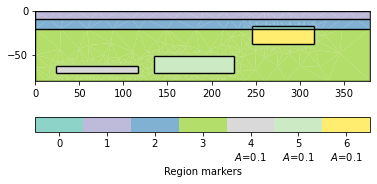

In [3]:
pg.show(Three_rec_list[0])

#### Create a Dipole Dipole ('dd') measuring scheme with 4 electrodes. Put all electrode positions into the scheme to enforce mesh refinement. Also add further refinement nodes in a distance of 10% of electrode spacing to achieve sufficient numerical accuracy.

In [4]:
scheme = ert.createData(elecs = np.linspace(start=20, stop=360, num=64), schemeName='dd')

for p in scheme.sensorPositions():
    geom.createNode(p)
    geom.createNode(p + pg.RVector3(0, -0.1))

In [5]:
res_values = np.linspace(start=10, stop=1200, num=110).astype(int)

In [ ]:
plt.rcParams['image.cmap']='gray'
plt.set_cmap('gray')
plt.set_cmap('gray')

counter = 522
        
for i in Three_rec_list:
    
    mesh = mt.createMesh(i, quality = 34)
    
    object_res = random.choice(res_values)
    object_res_2 = random.choice(res_values)
    object_res_3 = random.choice(res_values)
    layer_1_res = random.choice(res_values)
    layer_2_res = random.choice(res_values)
    layer_3_res = random.choice(res_values)
    
    rhomap = [[0, object_res_3], [1, layer_1_res], [2, layer_2_res], [3, layer_3_res], [4, object_res], 
              [5, object_res_2], [6, object_res_3]]
    
    fig,ax=plt.subplots()
    pg.show(mesh, data=rhomap, label='Resistivity $(\Omega$m)', showMesh=False, showBoundary=False, colorBar=False,
           cMap='gray', vmin=10, vmax=1200, ax=ax)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig.set_size_inches(8,fig.get_figheight(), forward=True)
    
    fig.savefig('/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Three_Rec/'+str(counter)+'true_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    data = ert.simulate(mesh, res=rhomap, scheme=scheme, noiseLevel=1, noiseAbs=1e-6, seed=42)
    data.markInvalid(data('rhoa') < 0)
    data.removeInvalid()
    
    fig1,ax1=plt.subplots()
    pg.show(data, showMesh=False, showBoundary=False, colorBar=False, cMap='gray', vmin=10, vmax=1200, ax=ax1)   
    #ax=plt.gca();fig=plt.gcf();
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    ax1.tick_params(left=False,bottom=False)
    plt.axis('off')
    fig1.set_size_inches(8,fig1.get_figheight(), forward=True)
    
    fig1.savefig('/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Three_Rec/'+str(counter)+'app_res_model.tiff', dpi=200, bbox_inches='tight', pad_inches=0)
    
    counter = counter + 1

ModellingBase::setMesh() copying new mesh ... Found datafile: 64 electrodes
Found: 64 free-electrodes
rMin = 2.69841, rMax = 680
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.783 s
FOP updating mesh dependencies ... 0 s


06/08/22 - 21:37:43 - pyGIMLi - INFO - Calculate geometric factors.


Obtaining geometric factors (analytical)
Calculating response for model: min = 184 max = 1178
Allocating memory for primary potential...... 0.238

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 4.809
Factorize (Cholmod) matrix ... 4.549
Factorize (Cholmod) matrix ... 6.261
Factorize (Cholmod) matrix ... 4.528
Factorize (Cholmod) matrix ... 3.609
Factorize (Cholmod) matrix ... 4.497
Factorize (Cholmod) matrix ... 4.923
Factorize (Cholmod) matrix ... 5.138
Factorize (Cholmod) matrix ... 4.403
Factorize (Cholmod) matrix ... 5.902
Factorize (Cholmod) matrix ... 5.853
Factorize (Cholmod) matrix ... 3.709
Factorize (Cholmod) matrix ... 5.802
Factorize (Cholmod) matrix ... 5.435
Factorize (Cholmod) matrix ... 3.396
Factorize (Cholmod) matrix ... 5.381
Factorize (Cholmod) matrix ... 7.999
Factorize (Cholmod) matrix ... 4.293
Forward: time: 114.863s
Found neg. resp (saving).
3 -597.305 10762.1
3 4 5 6
Response: min = -3099.8 max 

06/08/22 - 21:40:02 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 0 within mesh.
06/08/22 - 21:40:04 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 3 within mesh.
